Universidad del Valle de Guatemala <br>
04/03/2022 <br>
Minería de Datos # 20 

# Hoja de Trabajo 3
## Árboles de Decisión

**Integrantes:**<br>
Walter Saldaña 19897 <br>
José Gutierrez 19111 <br>
Javier Cotto 19324 <br>

### Importar modulos

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Carga de datos

In [59]:
entrenamiento = pd.read_csv('train.csv', encoding='unicode_escape')
entrenamiento.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
prueba = pd.read_csv('test.csv', encoding='unicode_escape')
prueba.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2) Preprocesamiento de los datos.

Remover variables cualitativas que no aportan, ya que no son categóricas, y sus frecuencias no pueden ser clasificadas.

In [60]:
entrenamiento = entrenamiento.drop(['Street', 'Id', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                         'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                         'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 
                         'SaleType', 'SaleCondition'], axis=1)


Eliminar filas que contengan datos nulos (NaN).

In [61]:
entrenamiento.dropna(subset = ["LotFrontage"], inplace = True)
entrenamiento.dropna(subset = ["MasVnrArea"], inplace = True)
entrenamiento.dropna(subset = ["GarageYrBlt"], inplace = True)


## Resumen estadístico de las variables

In [62]:
entrenamiento.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,44.589652,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,185506.152542
std,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,157.828725,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,82999.159004
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000
75%,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


### Analisis de Datos

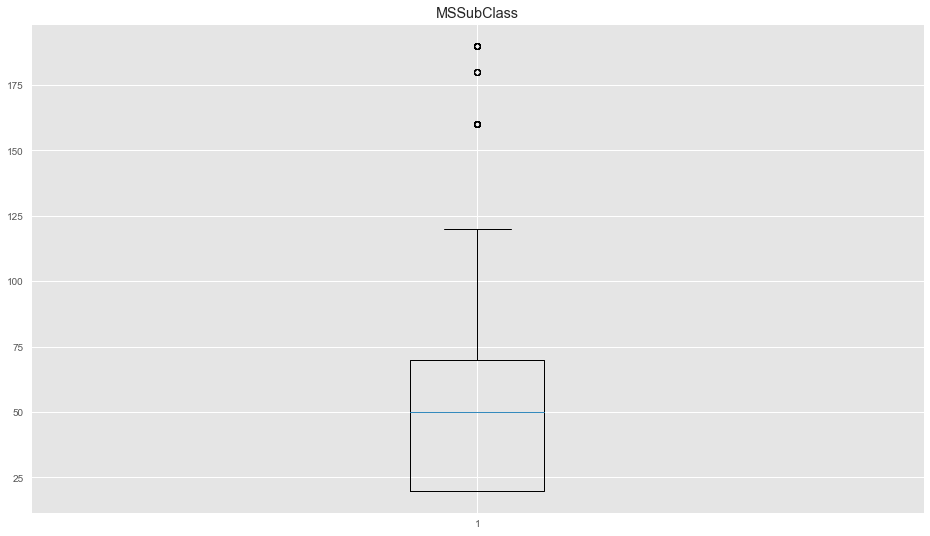

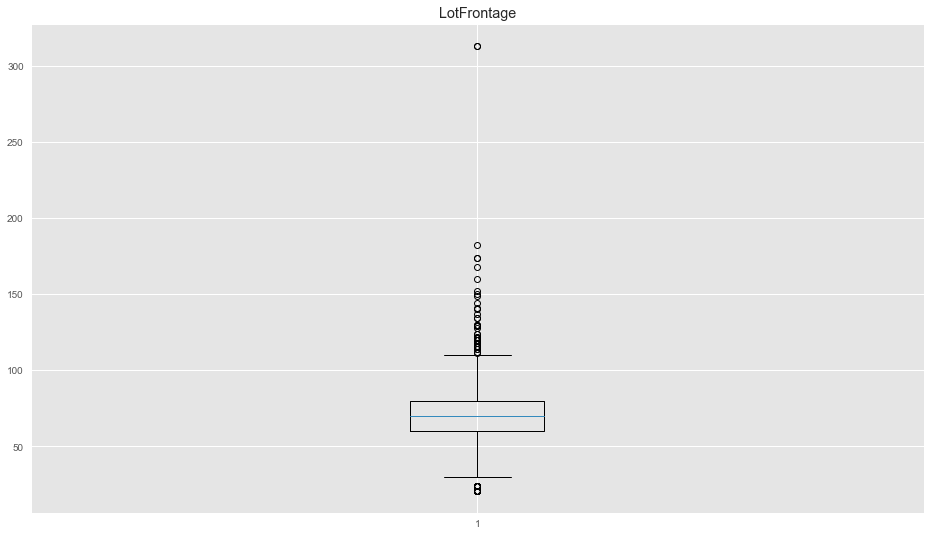

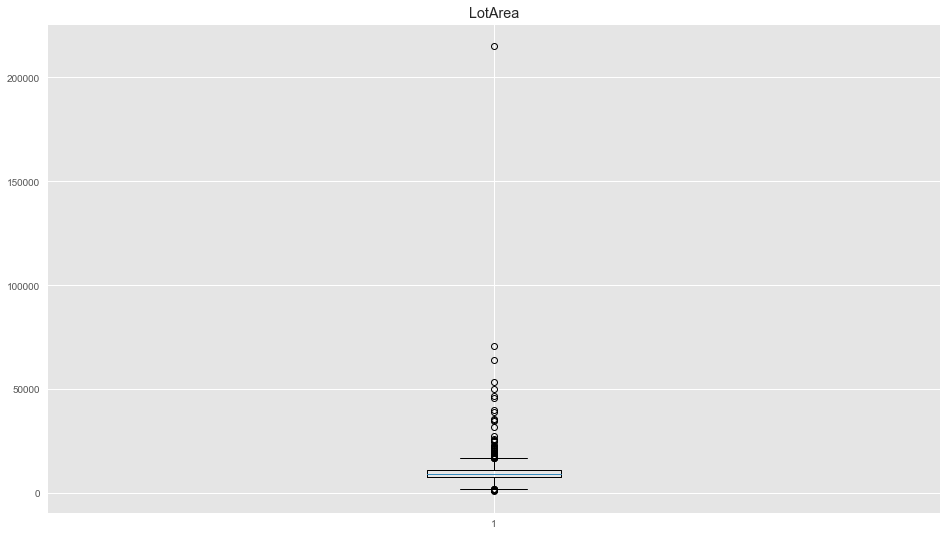

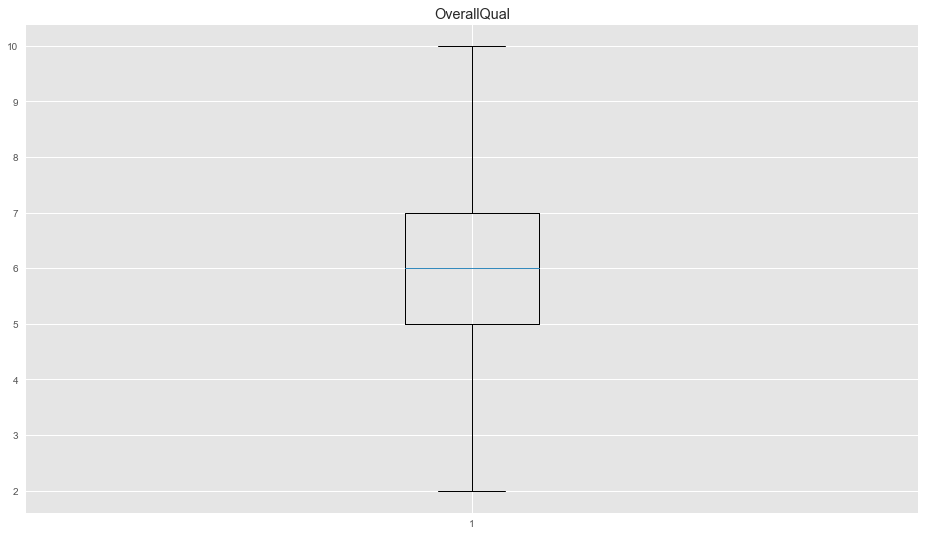

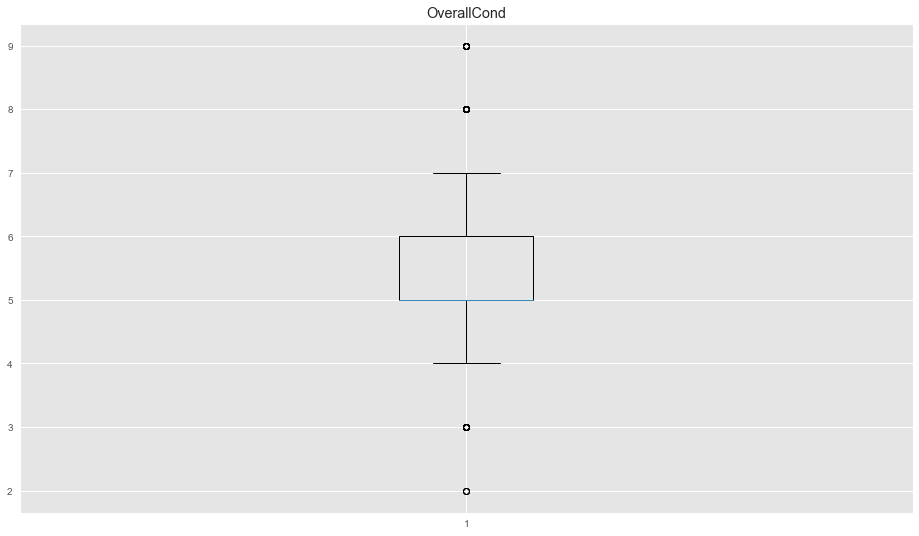

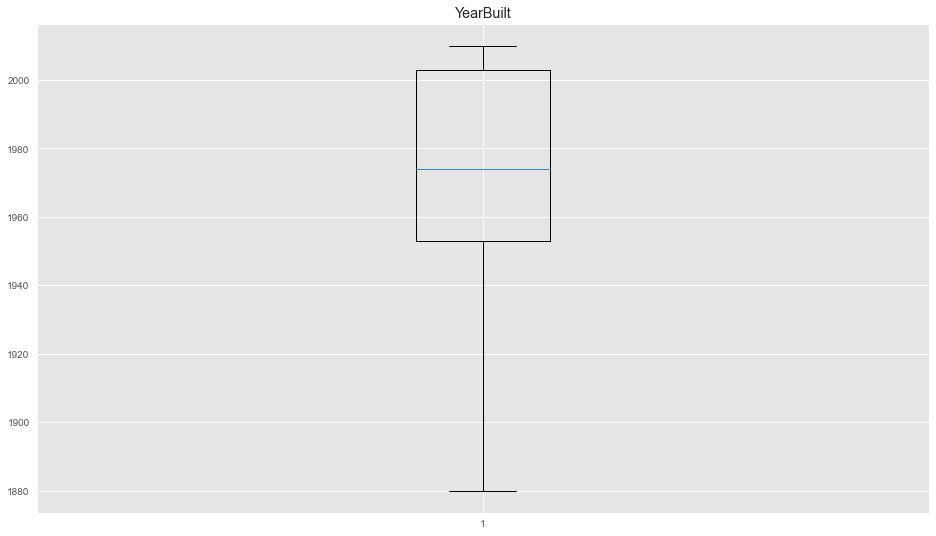

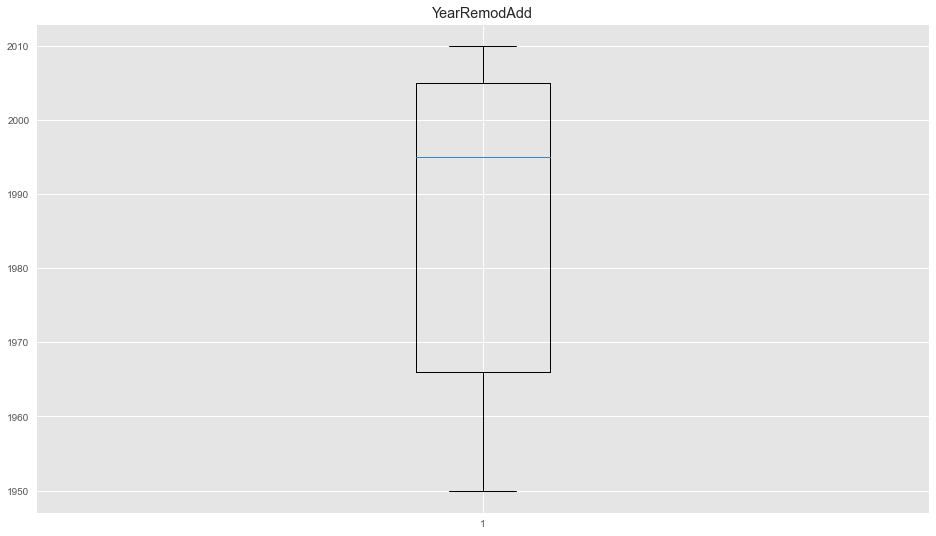

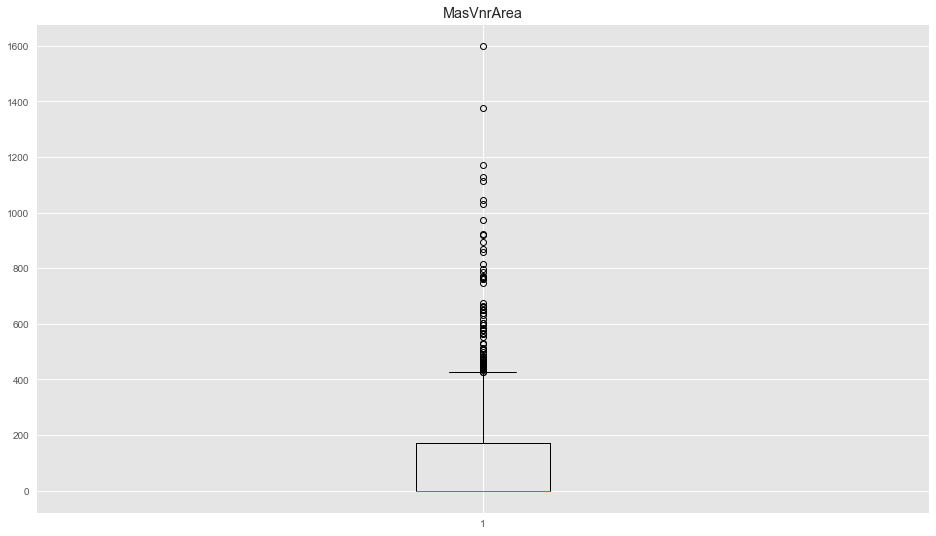

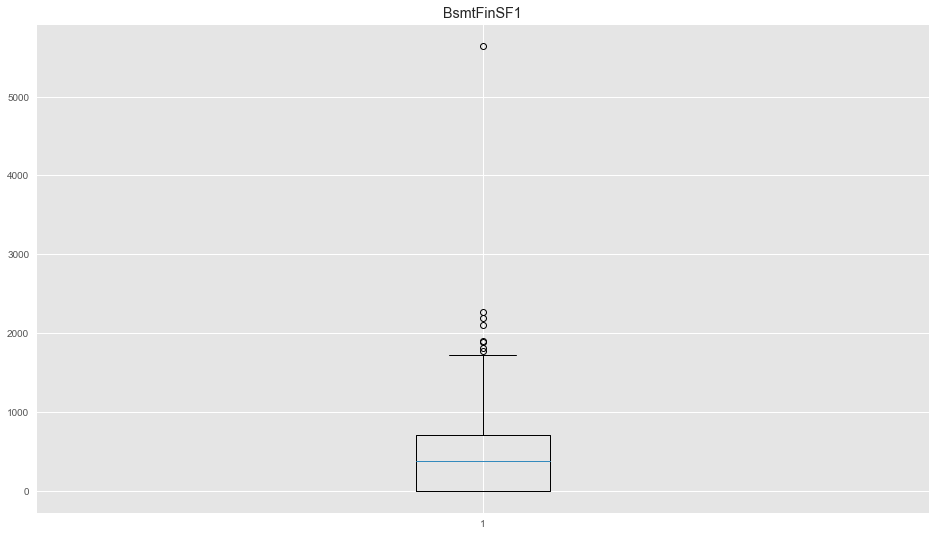

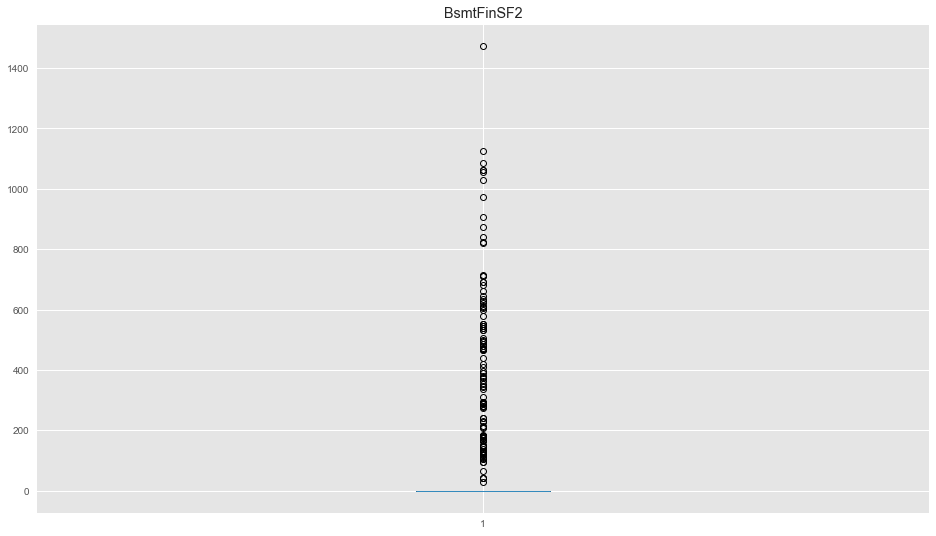

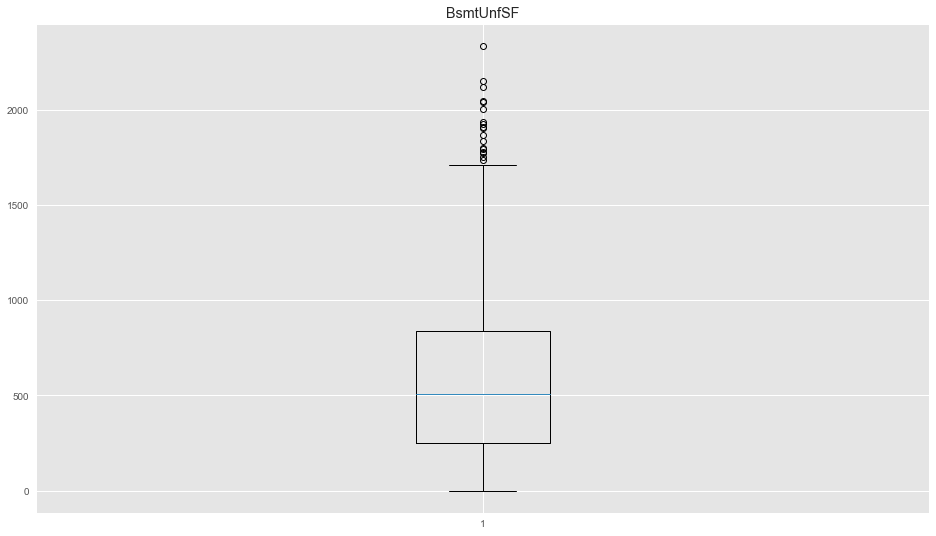

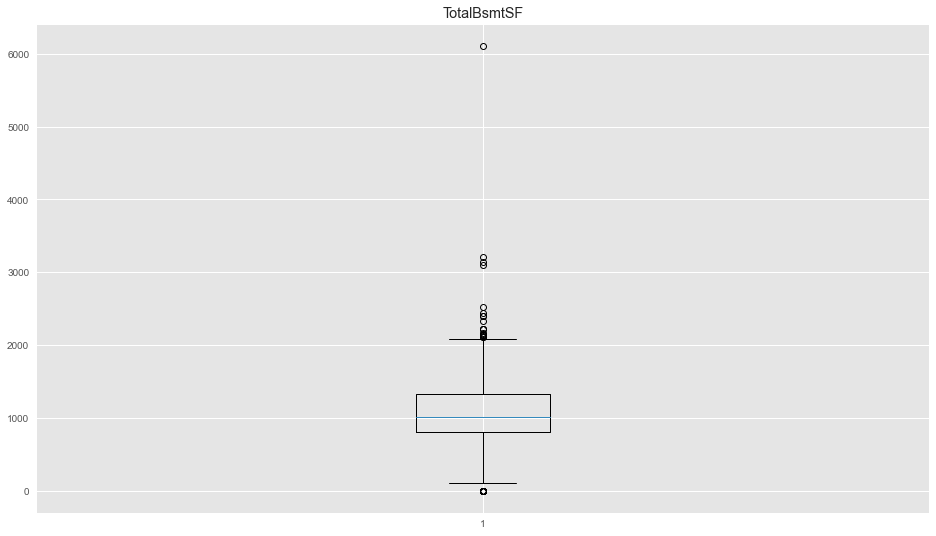

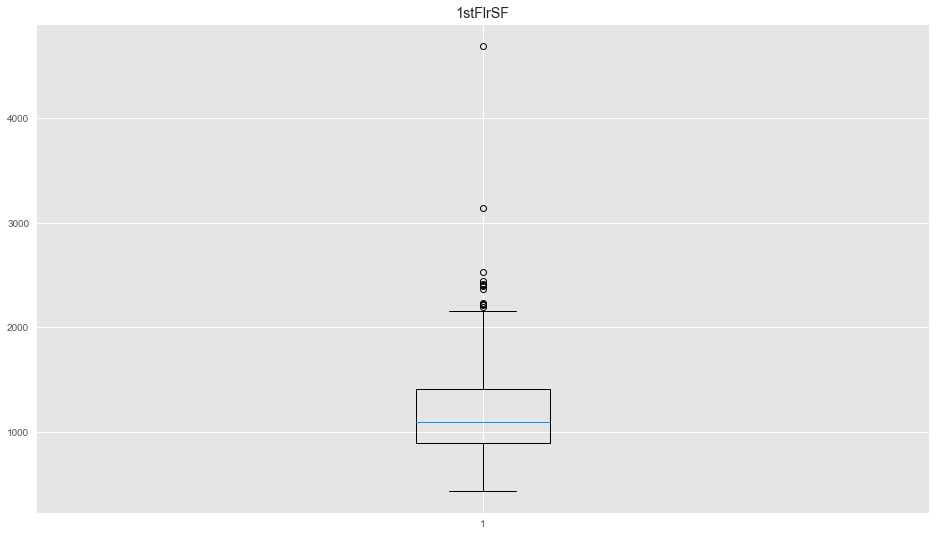

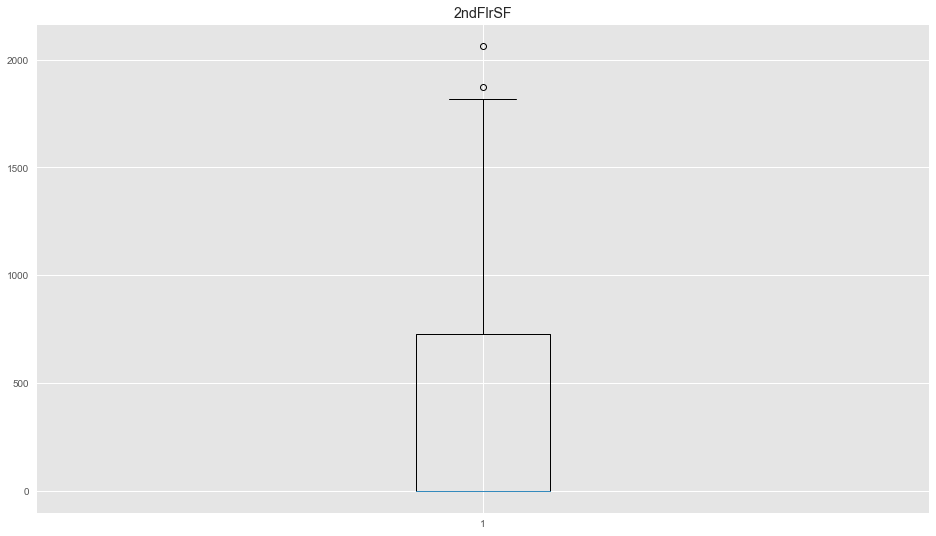

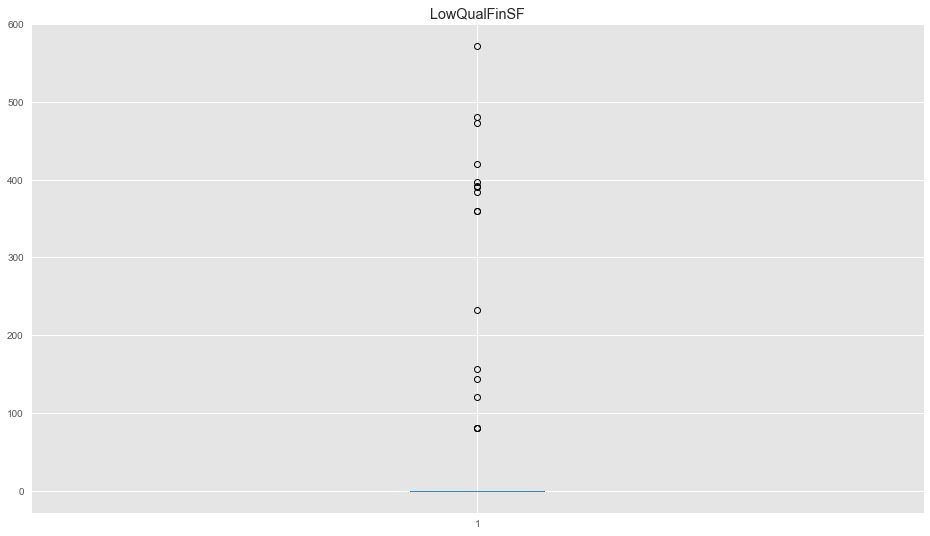

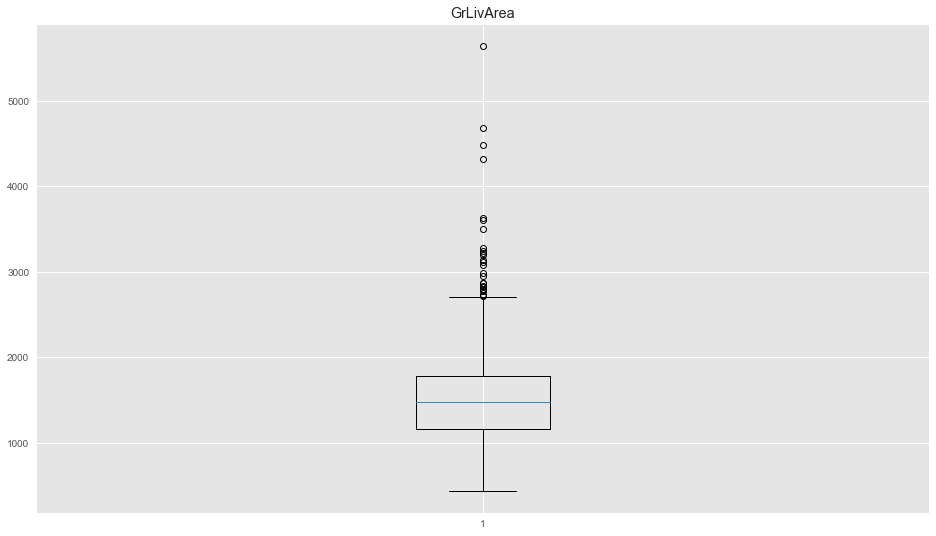

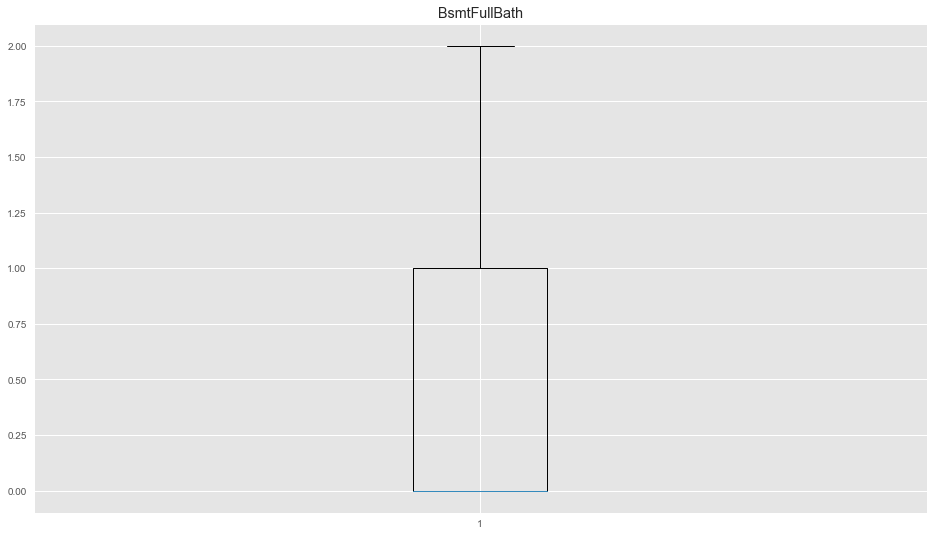

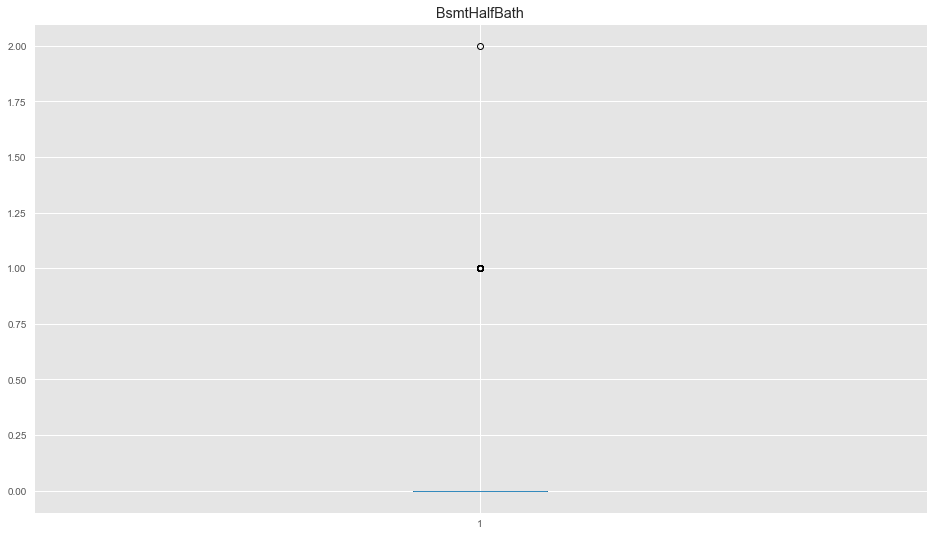

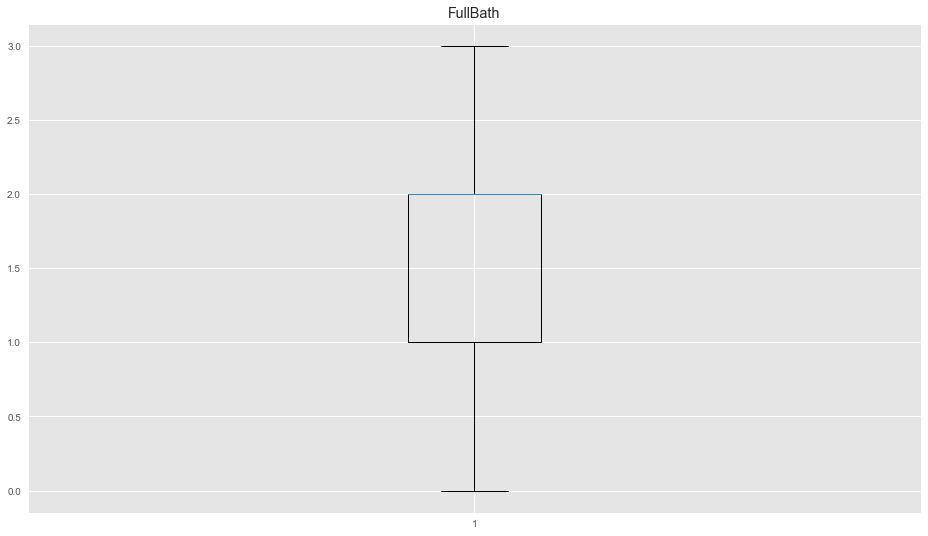

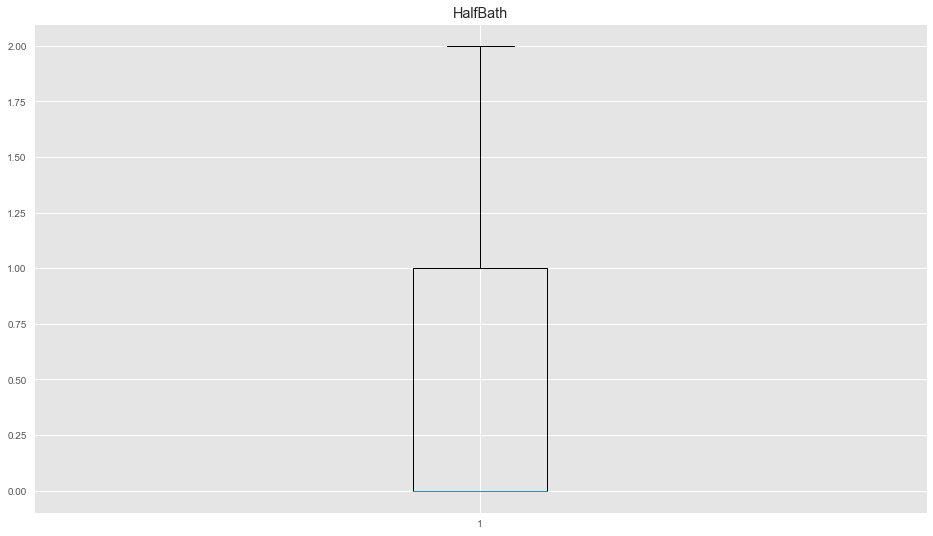

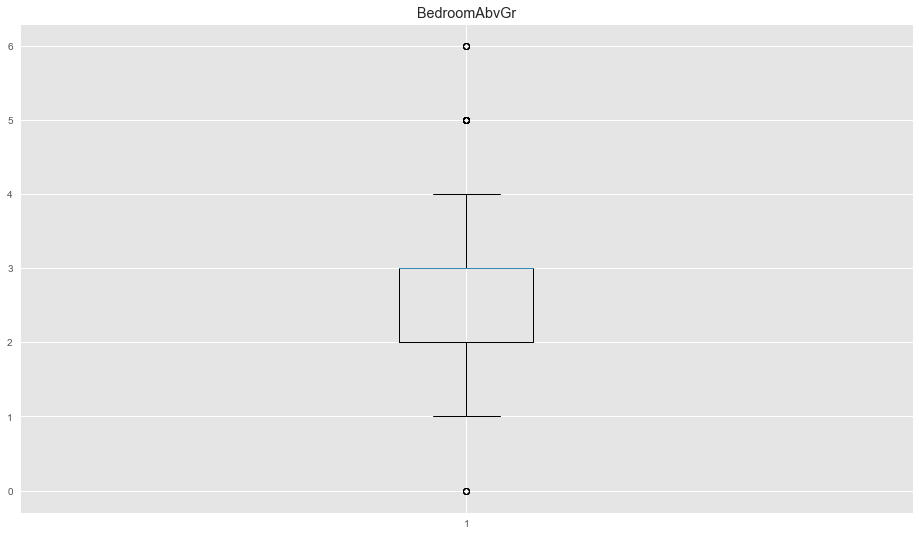

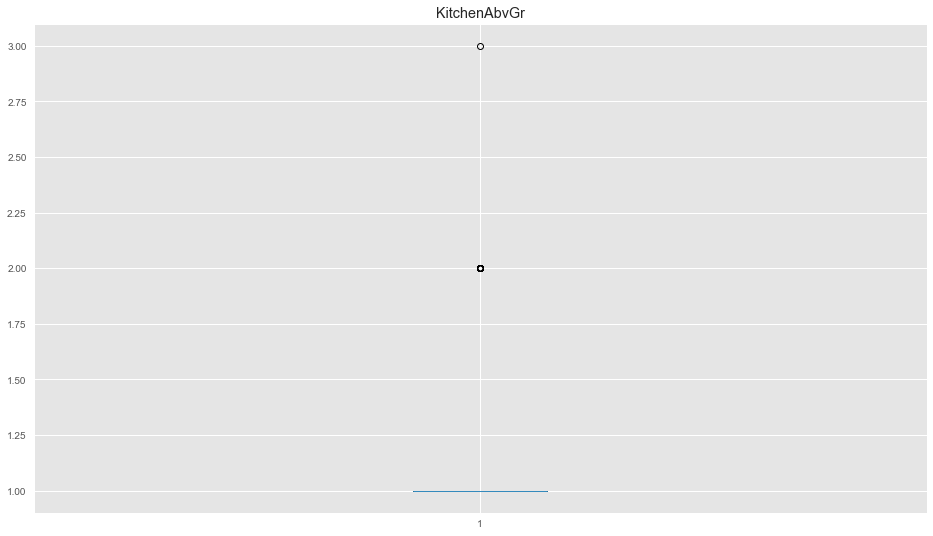

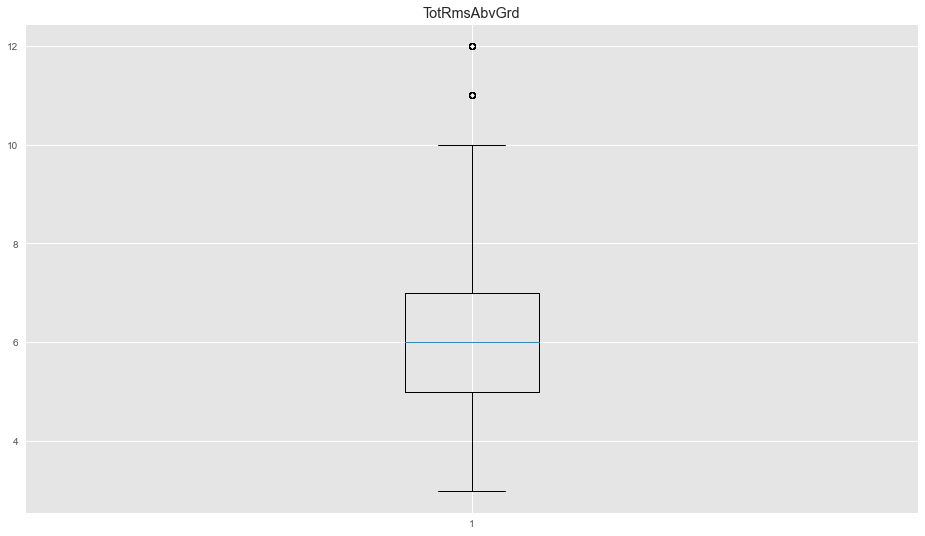

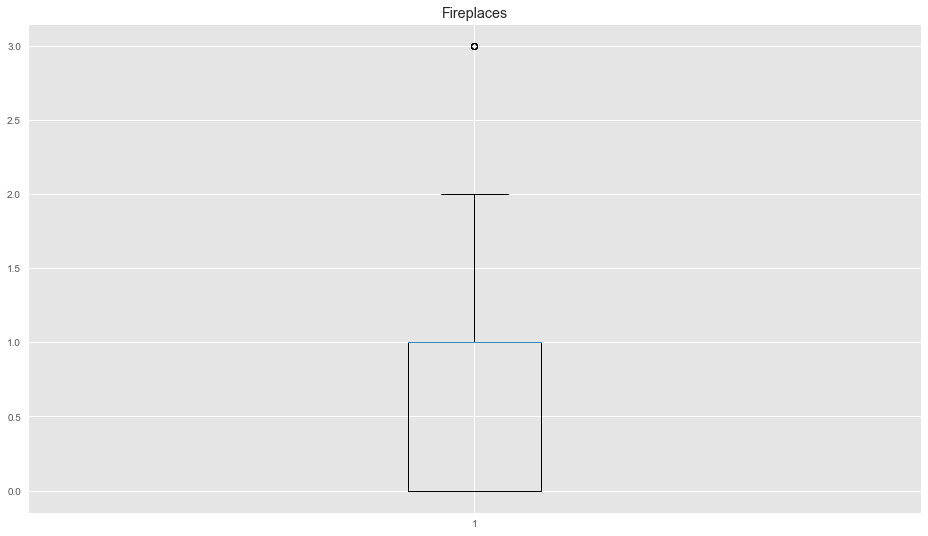

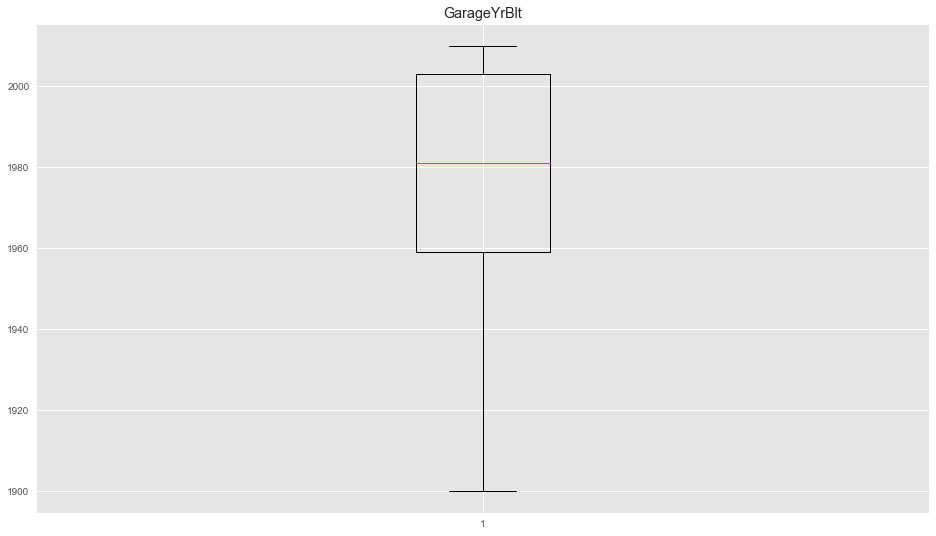

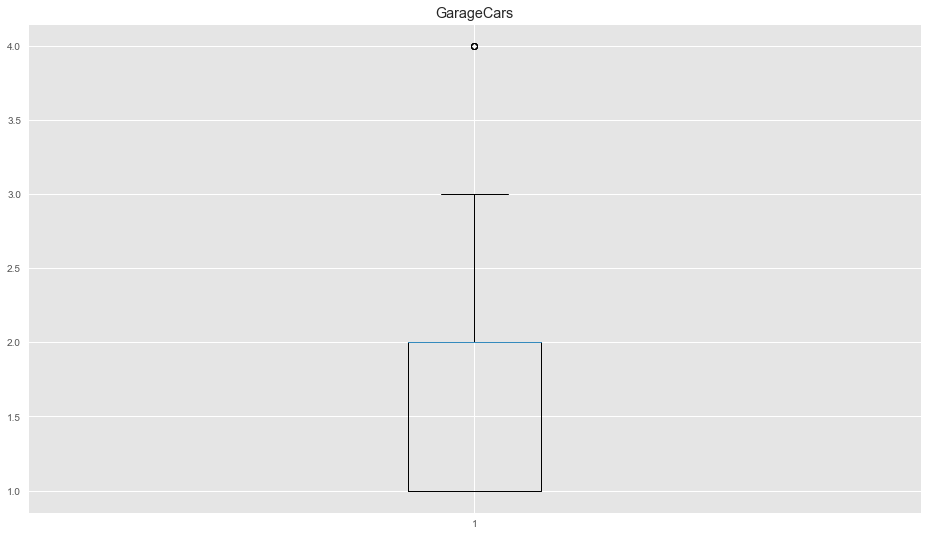

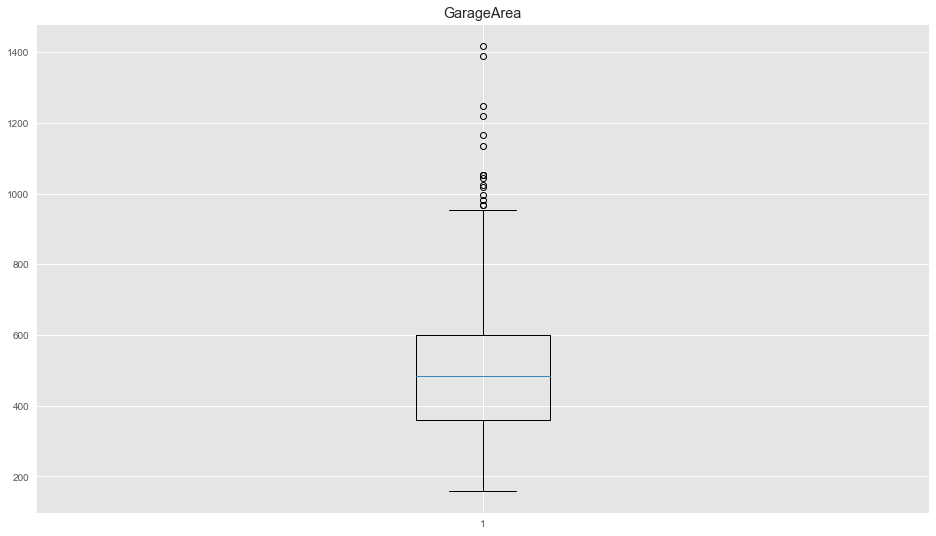

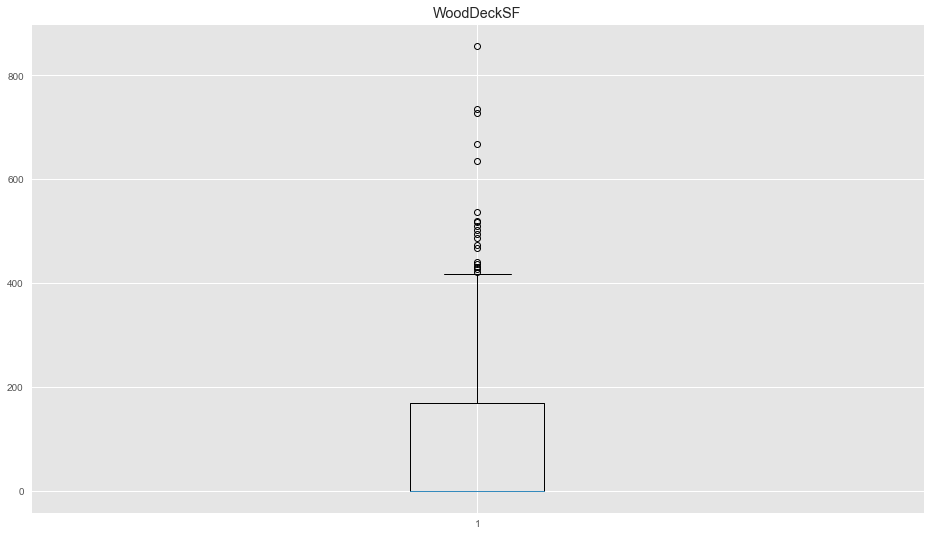

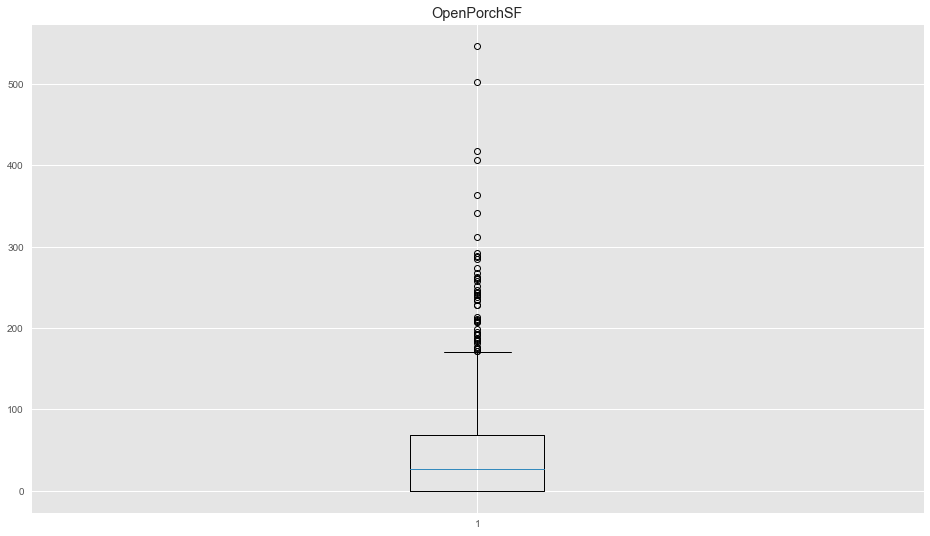

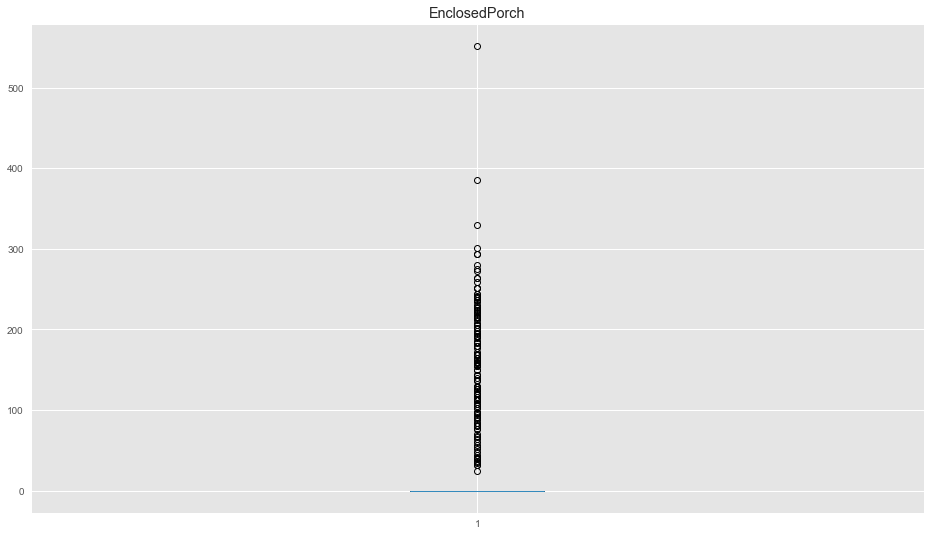

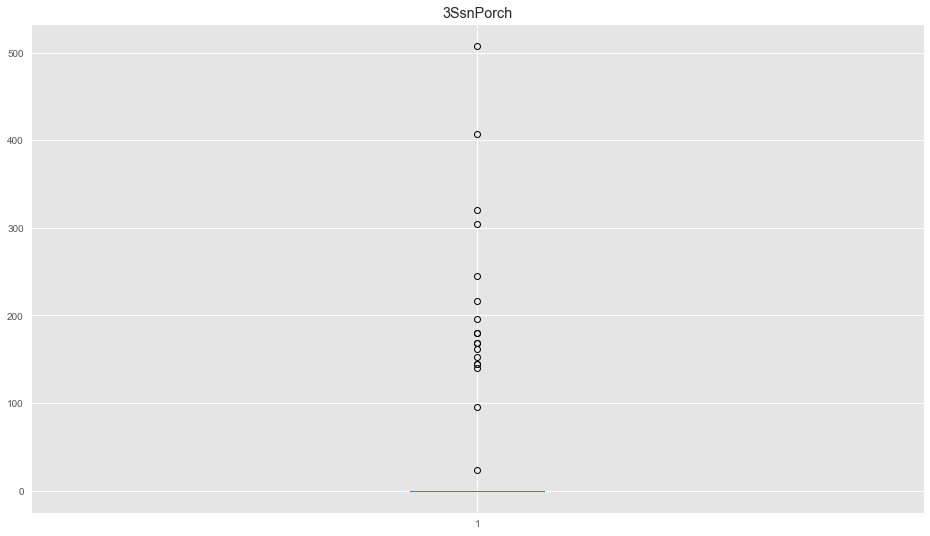

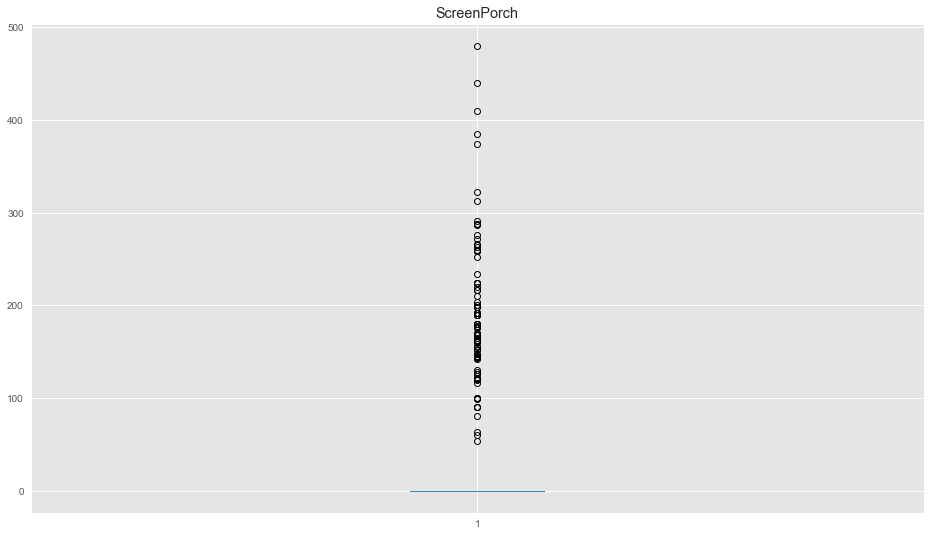

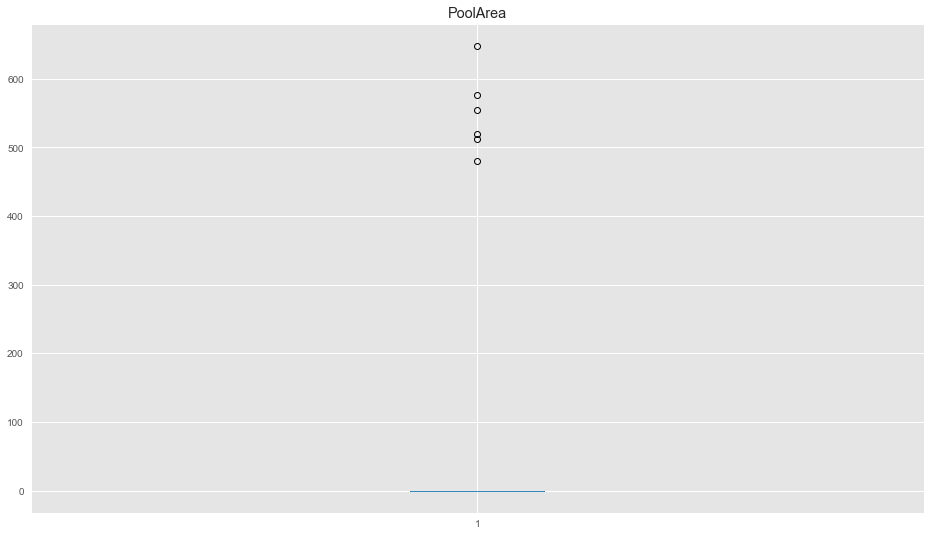

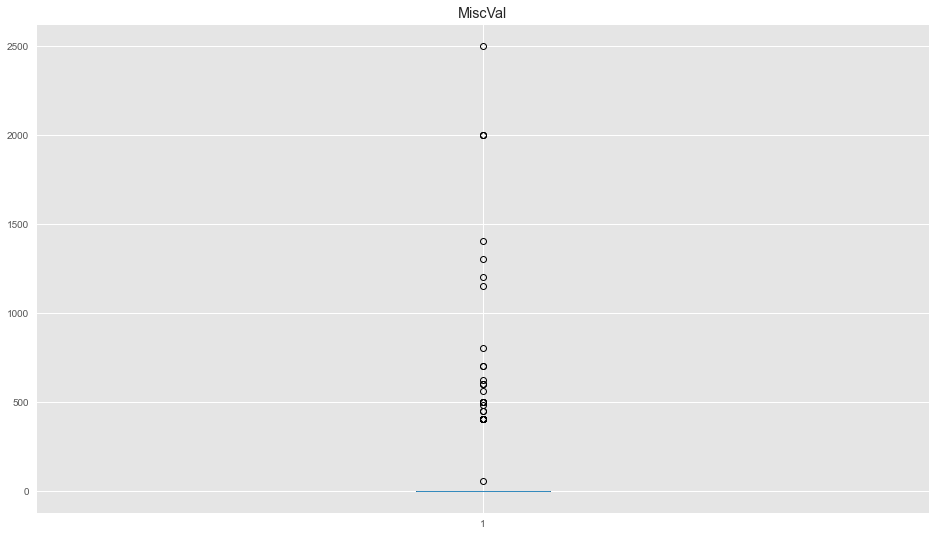

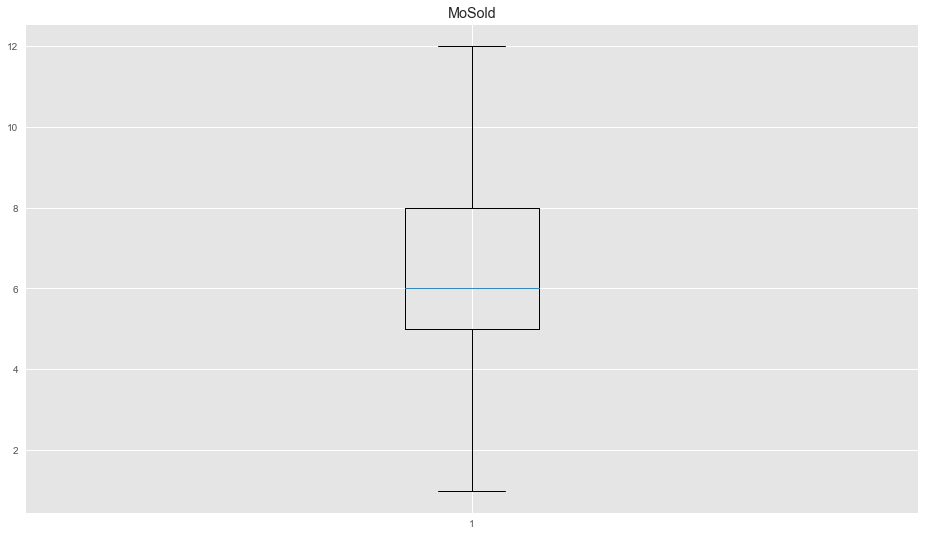

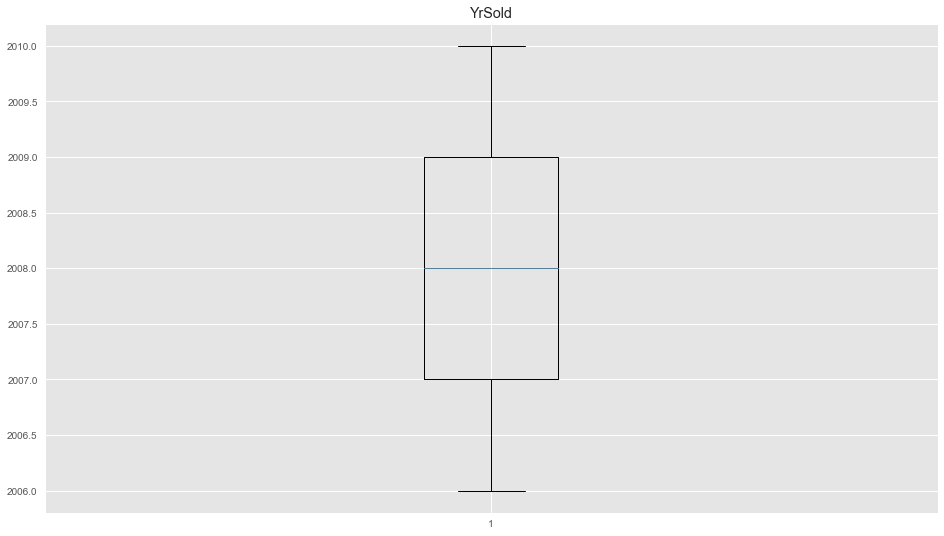

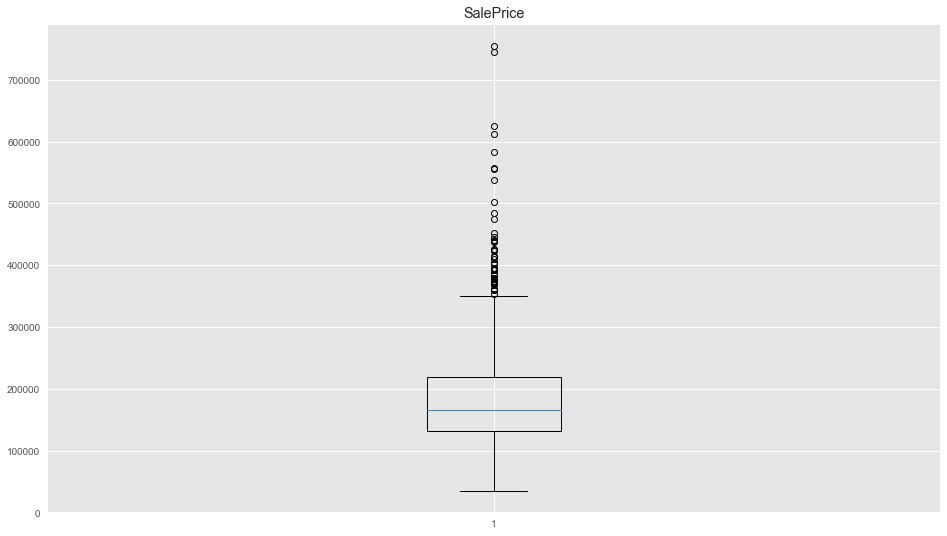

In [64]:
columns = []
for col in entrenamiento.columns:
    columns.append(col)
    
for columna in columns:
    plt.boxplot(entrenamiento[columna])
    plt.title(columna)
    plt.show()

### Eliminacion de datos atipicos

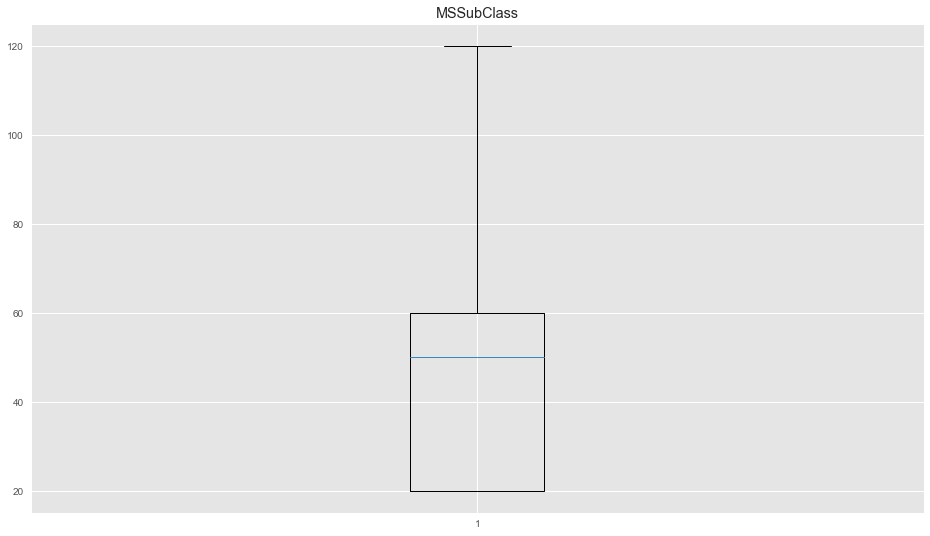

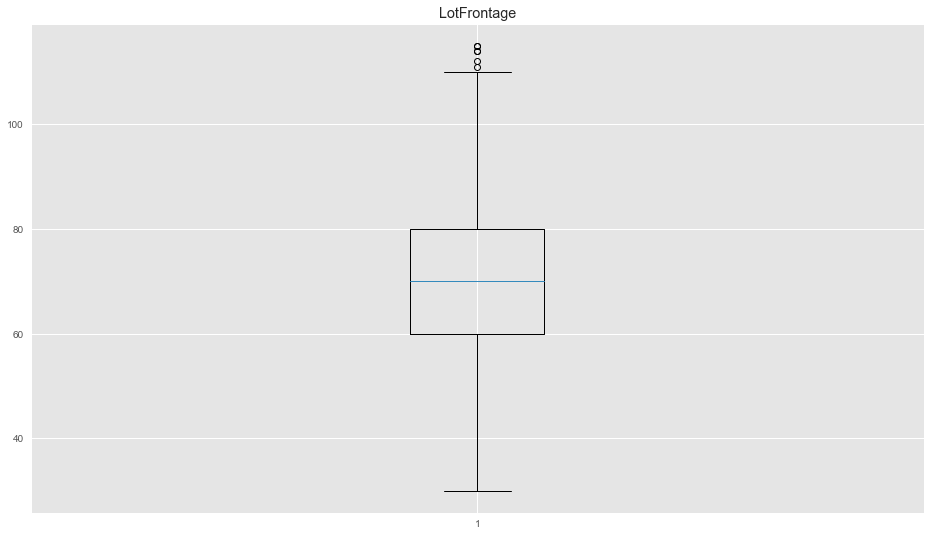

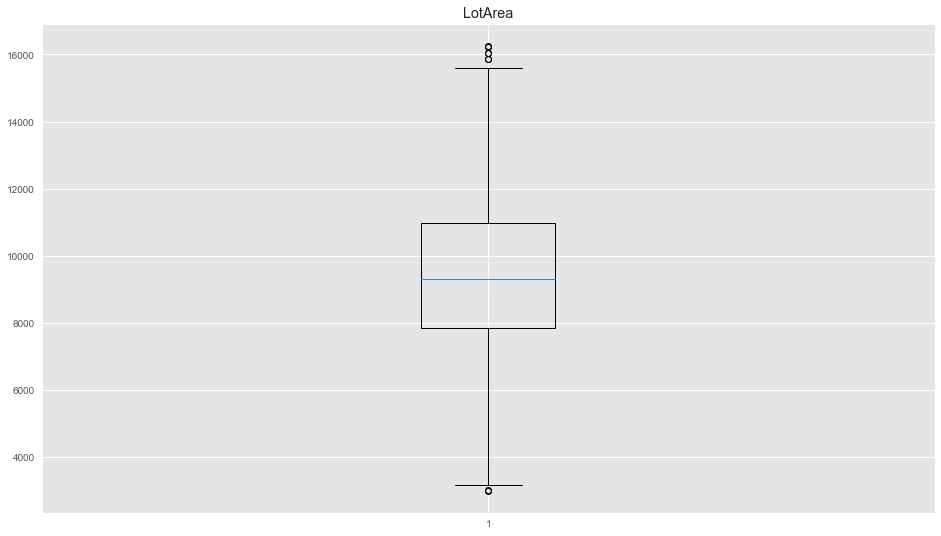

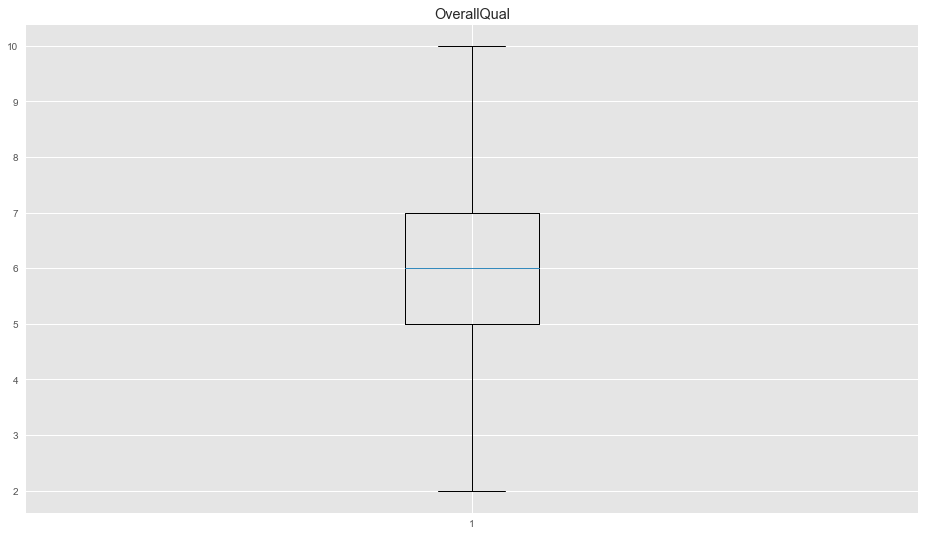

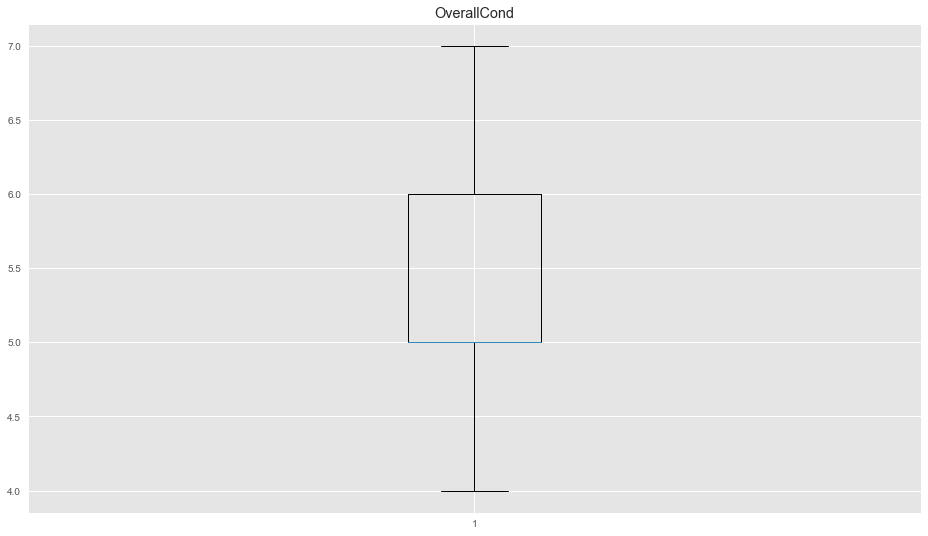

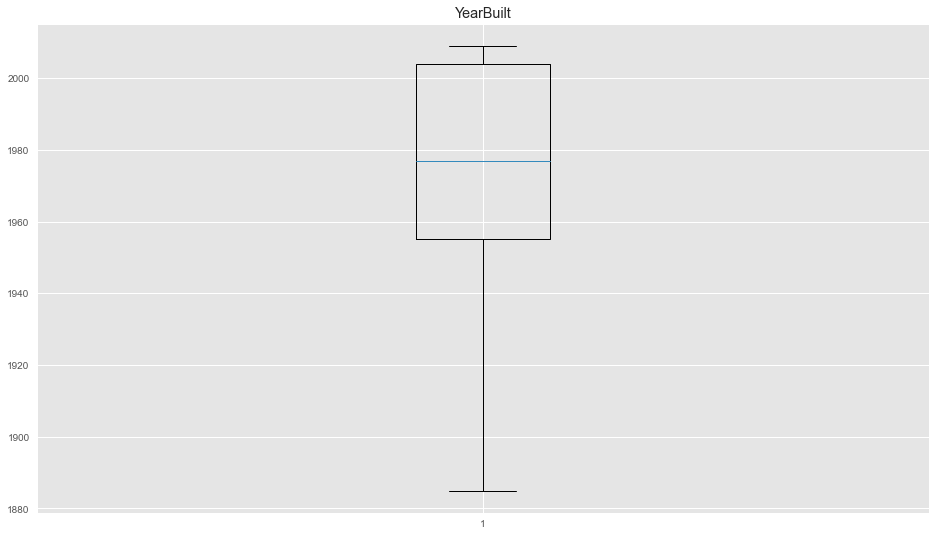

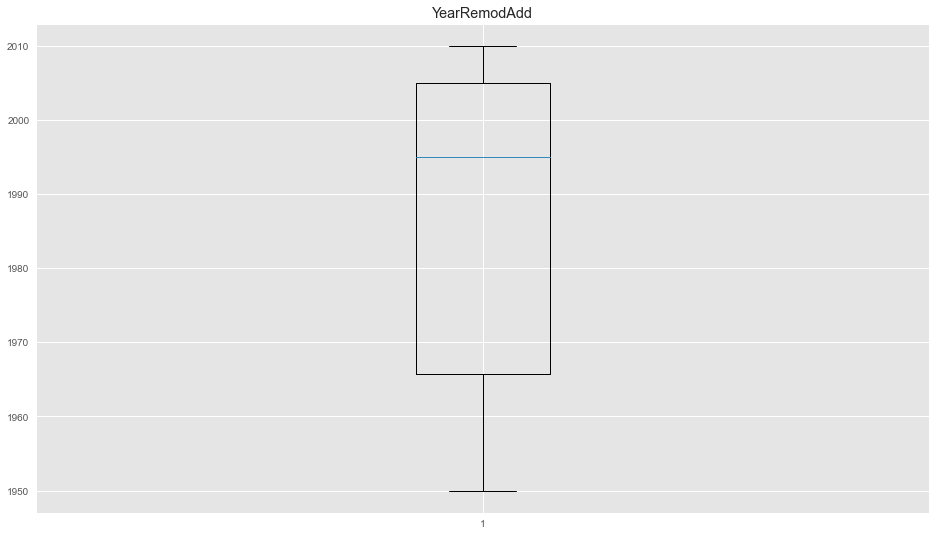

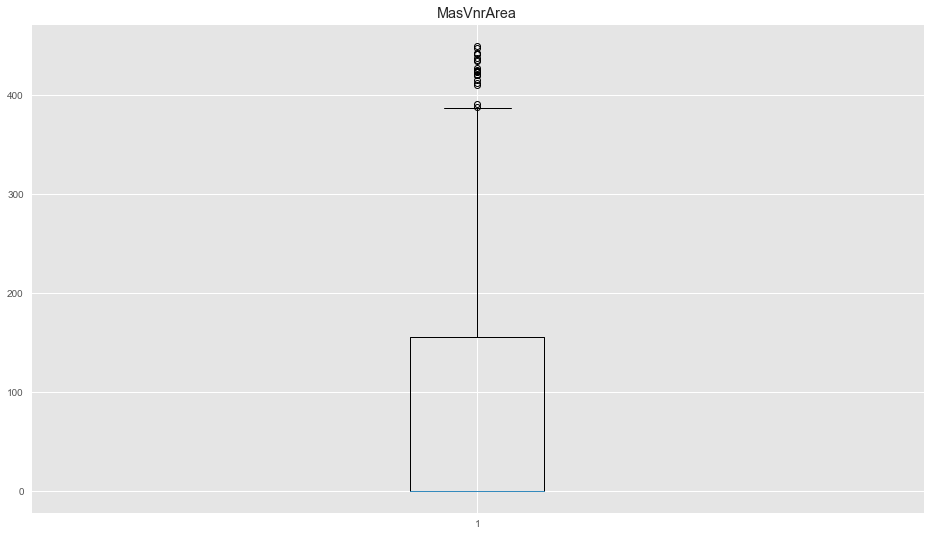

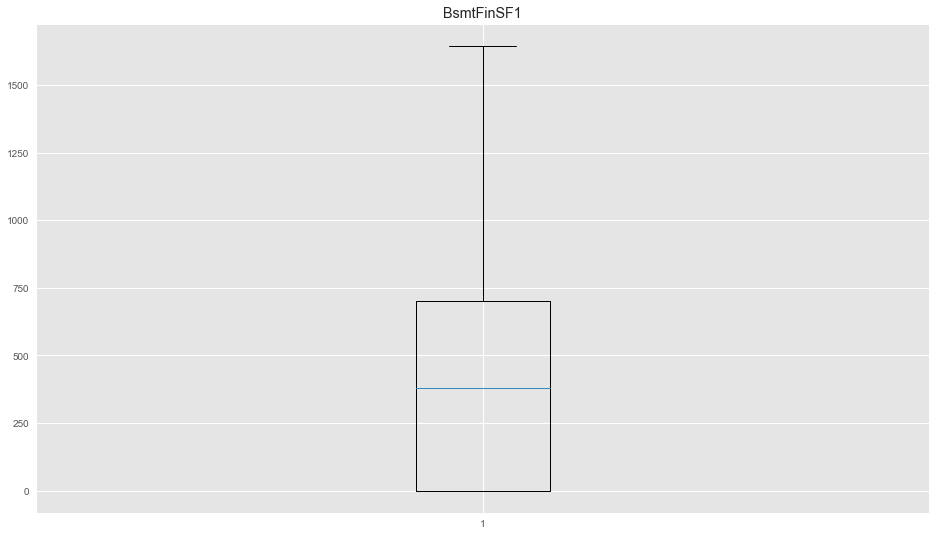

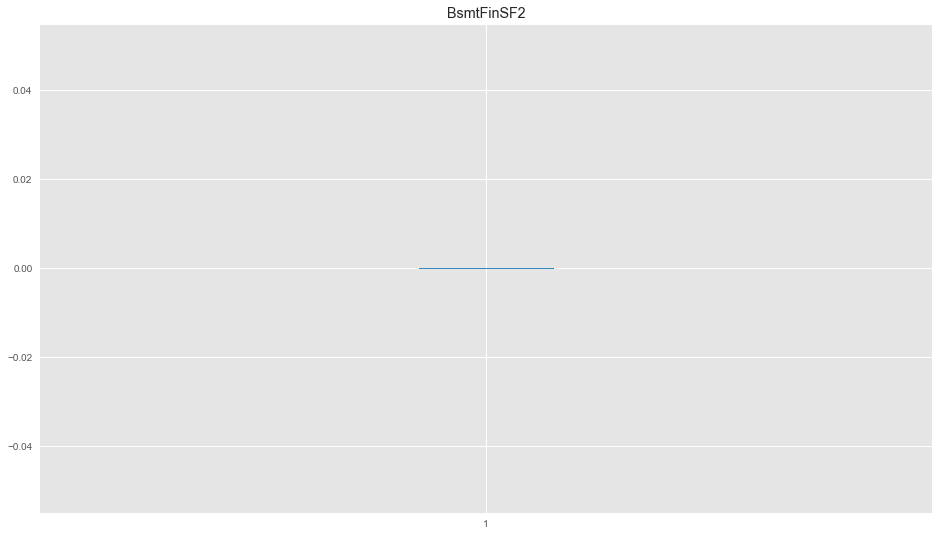

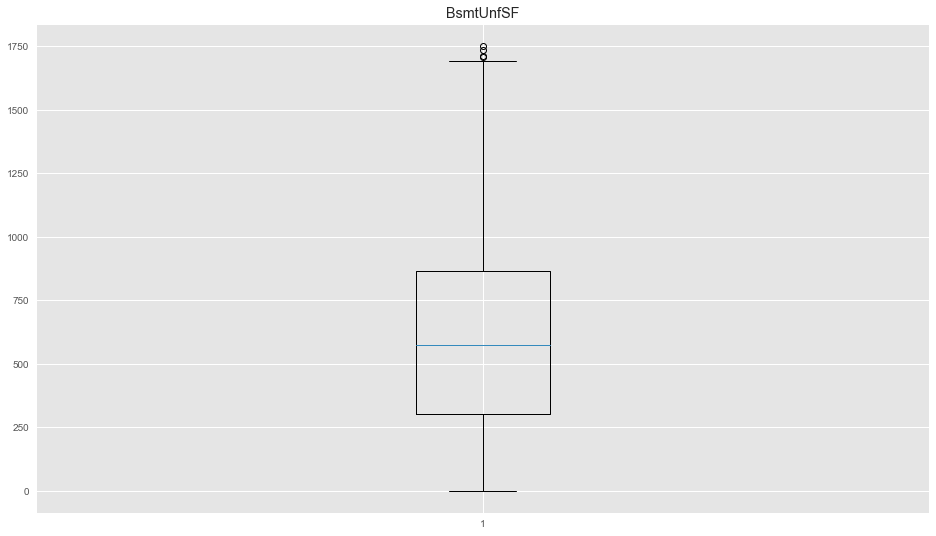

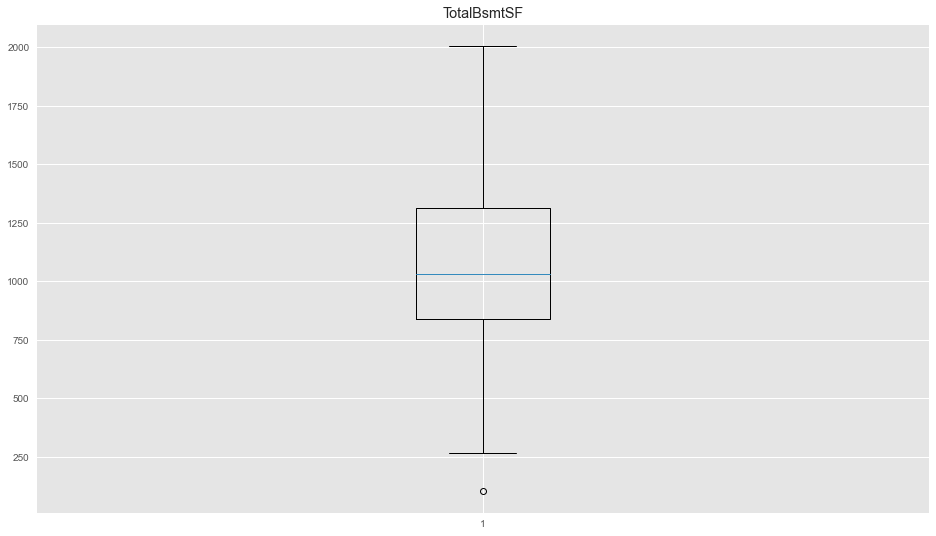

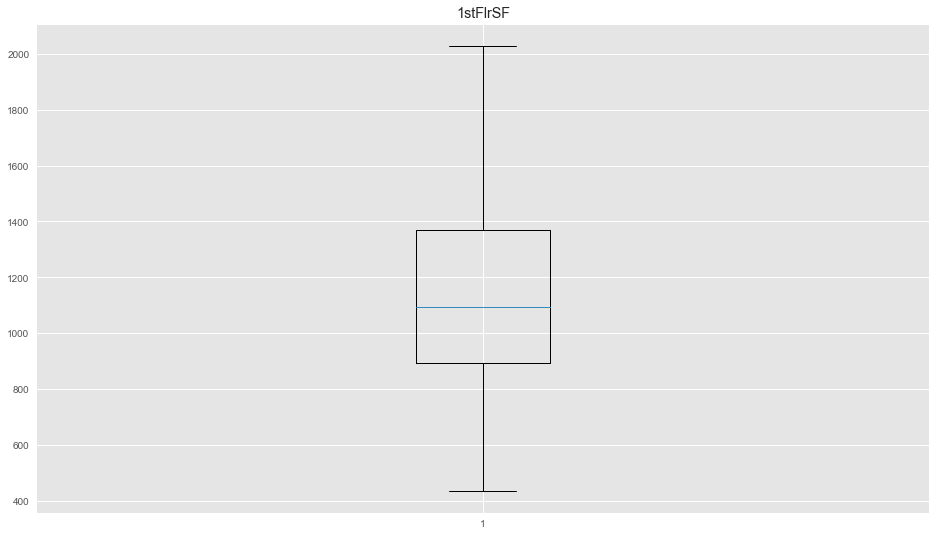

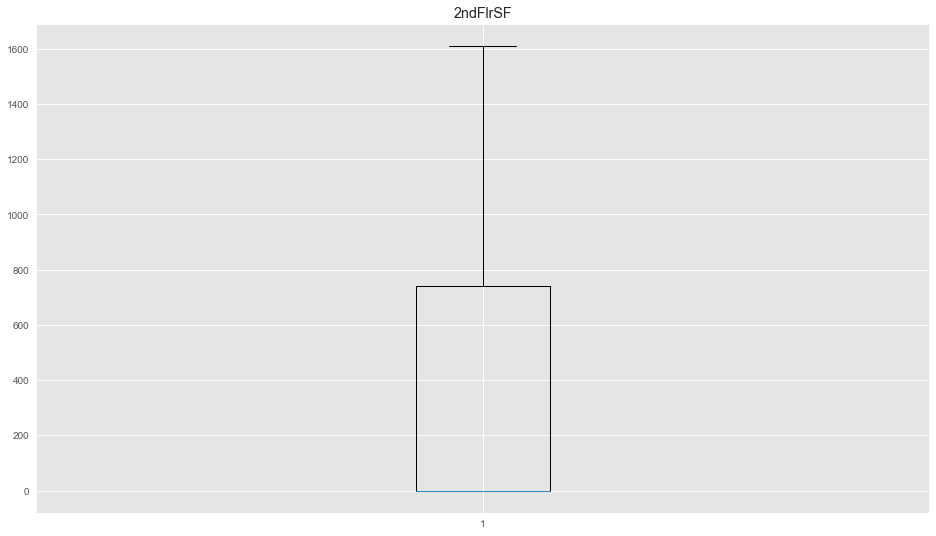

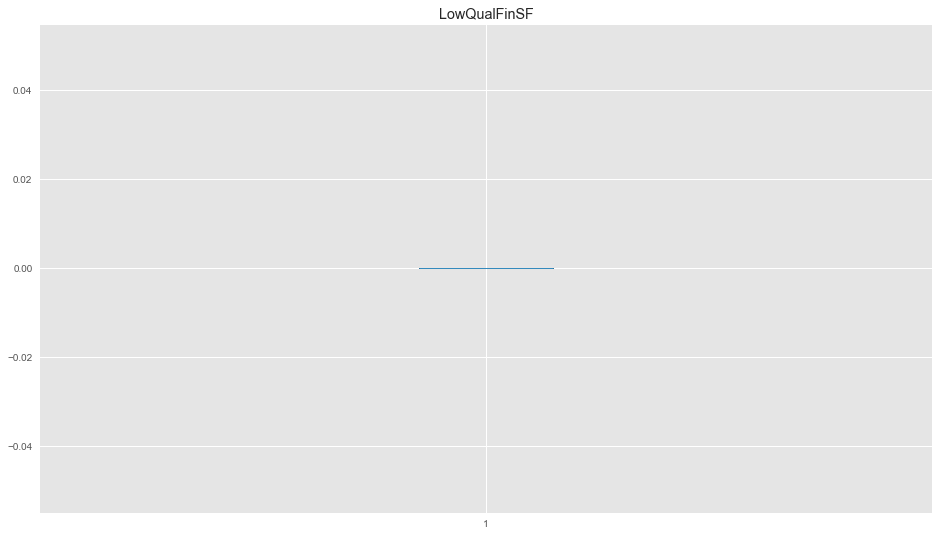

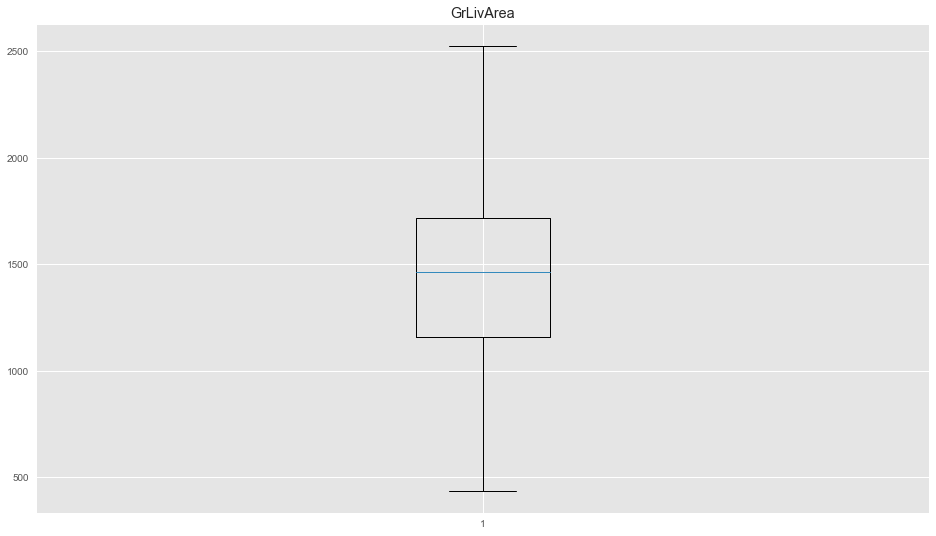

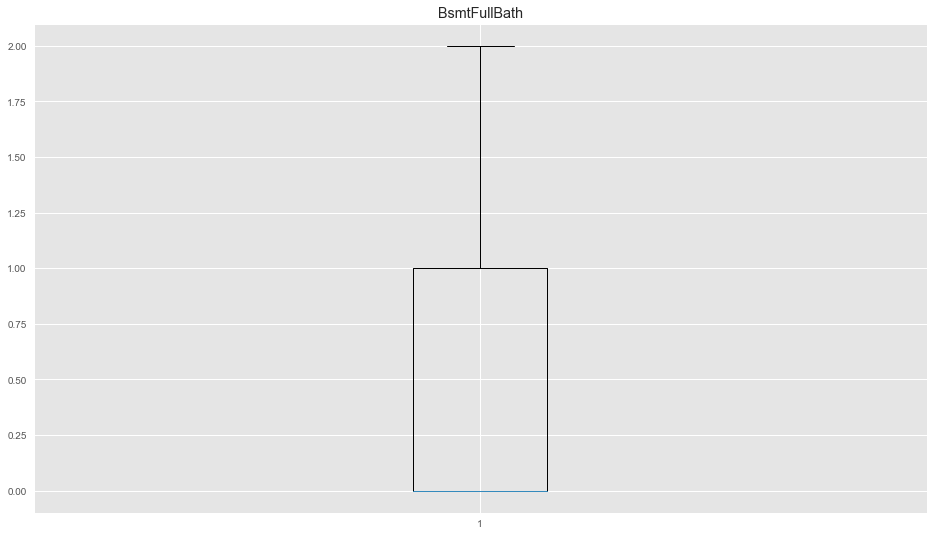

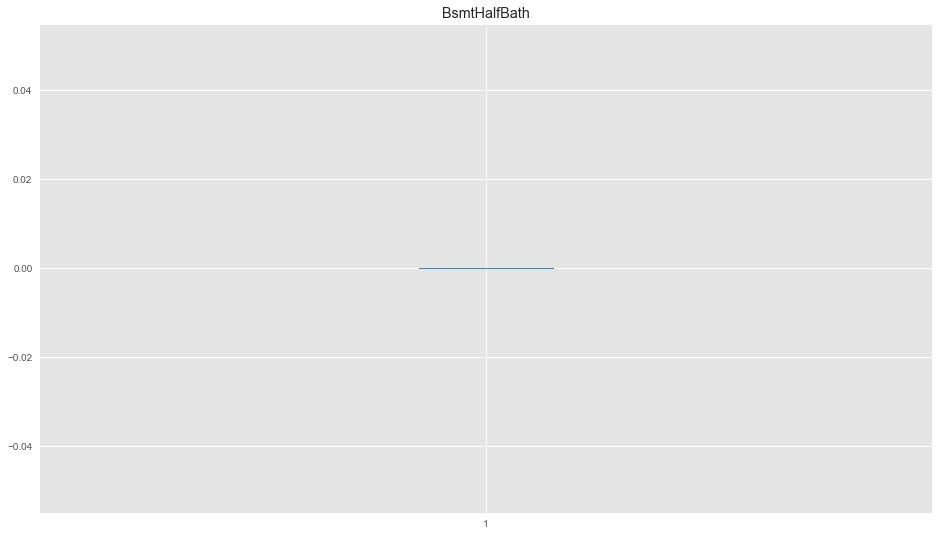

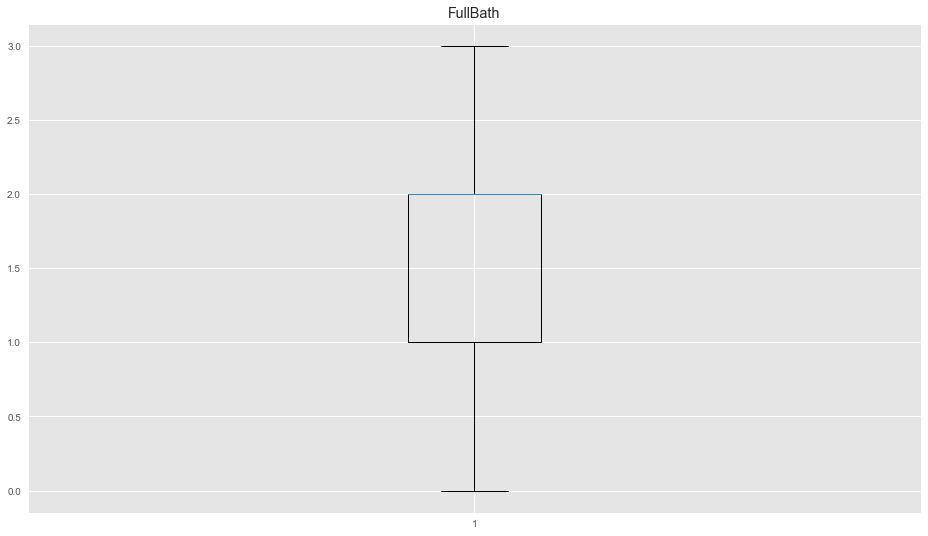

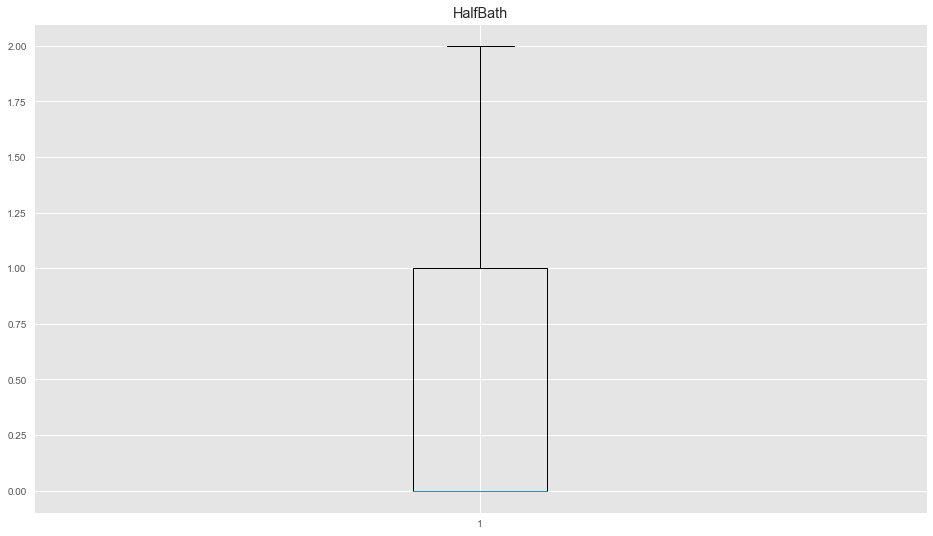

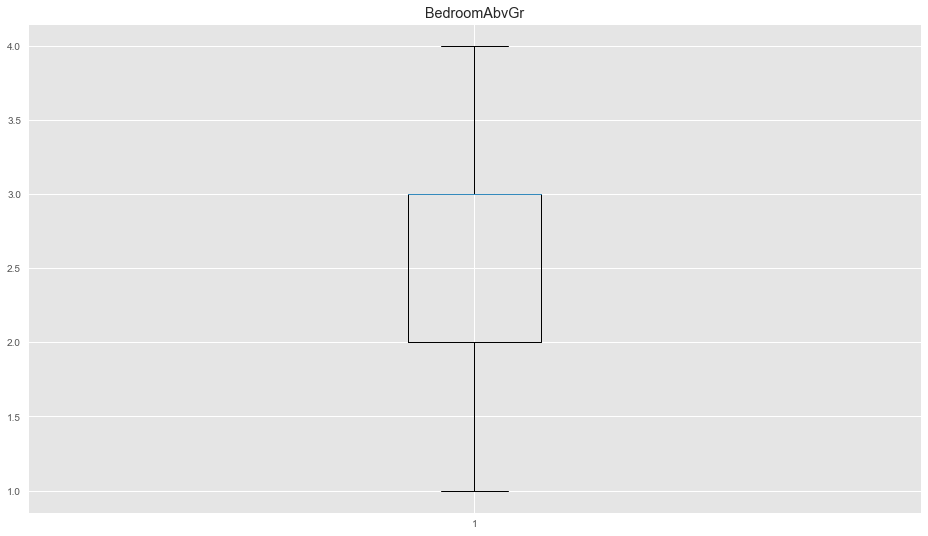

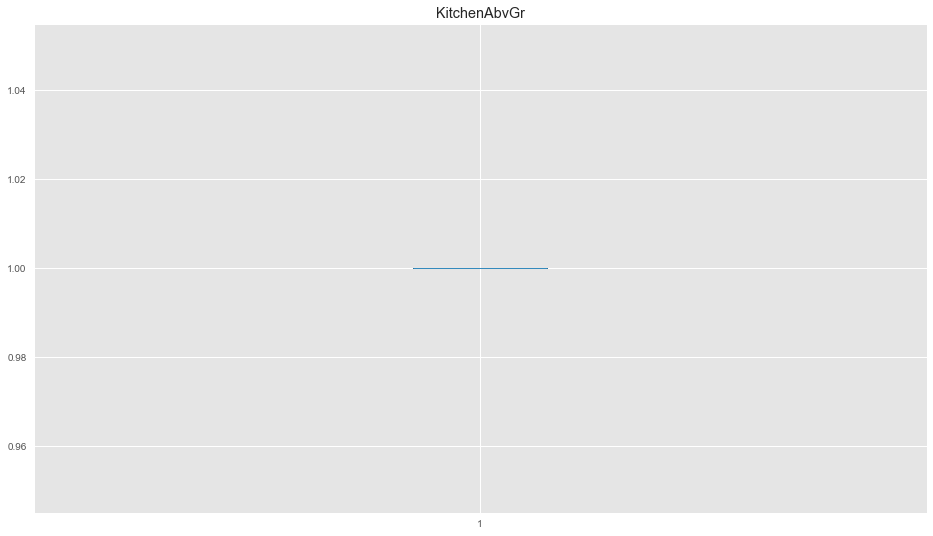

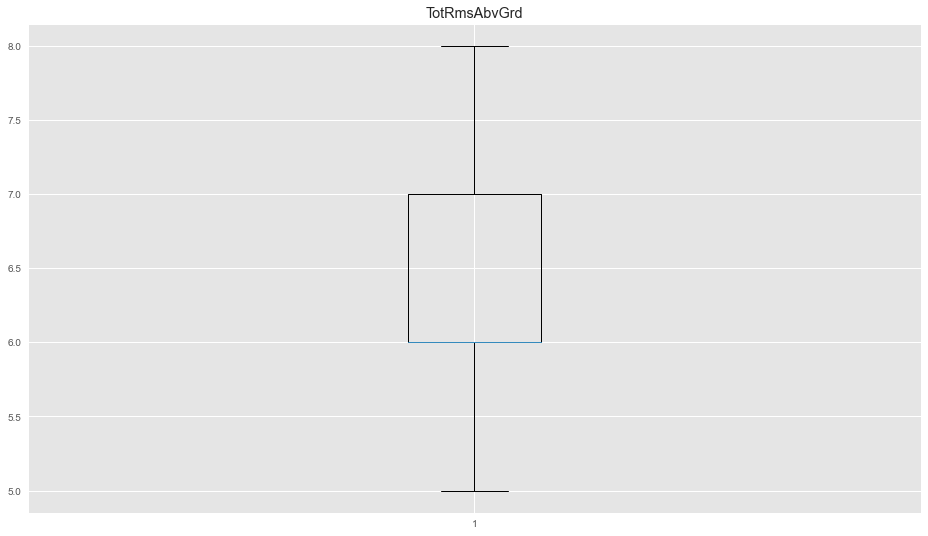

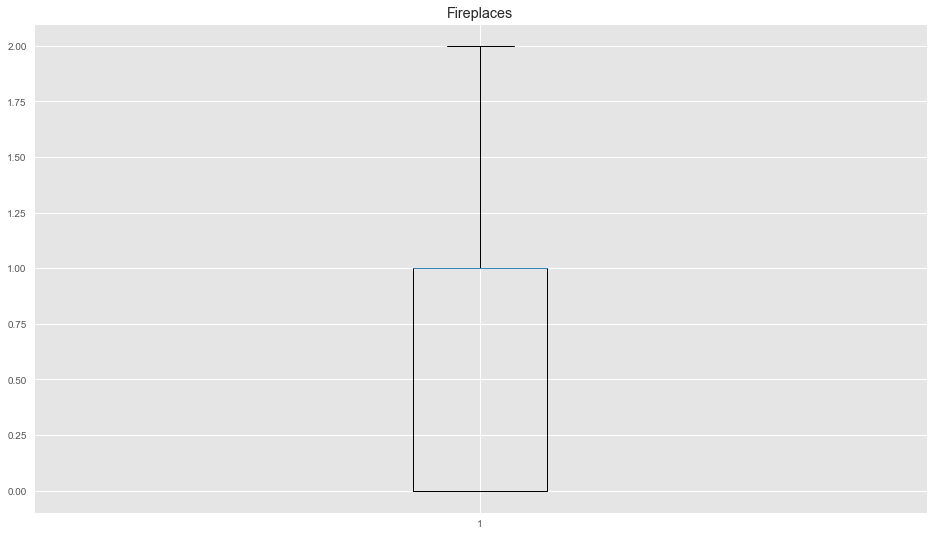

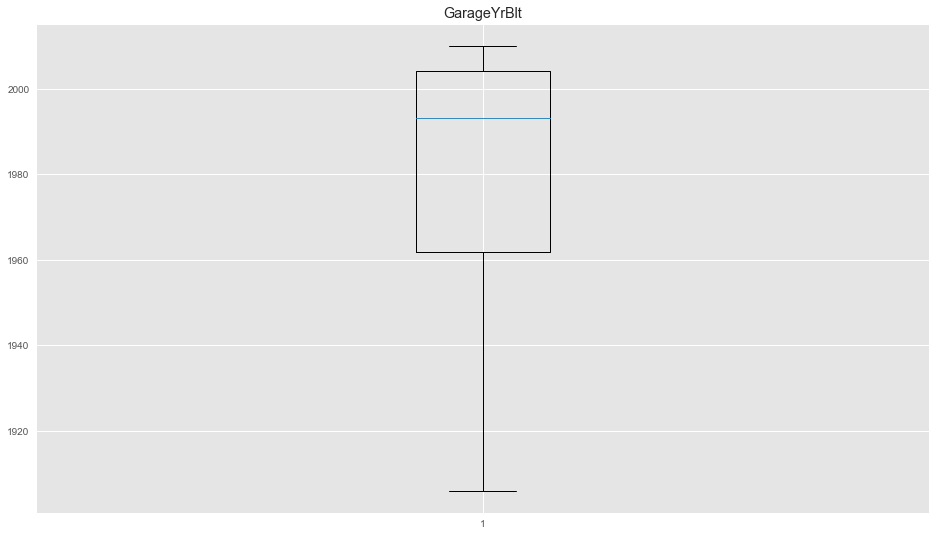

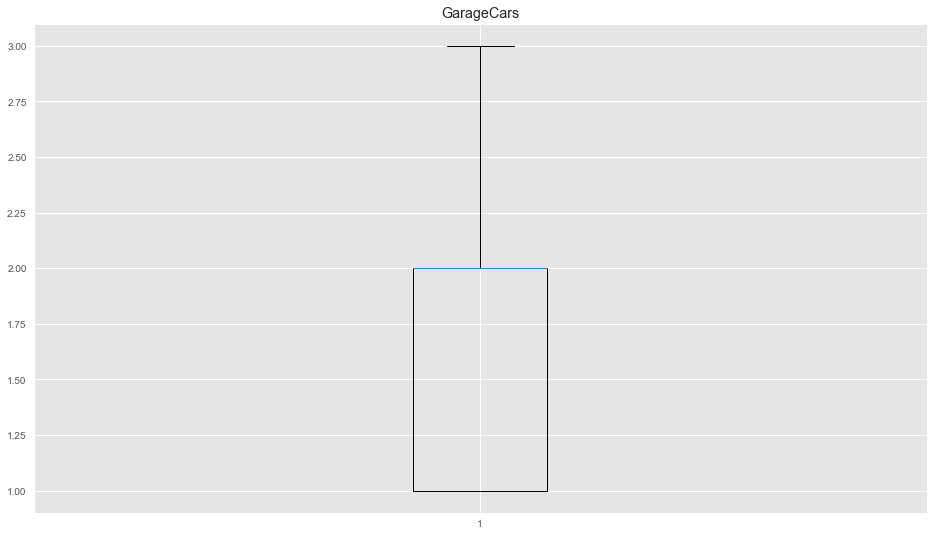

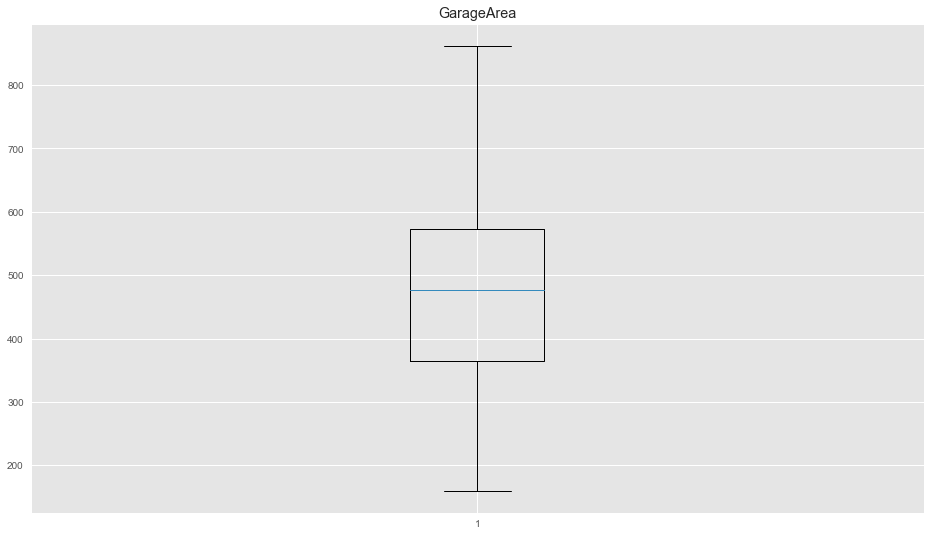

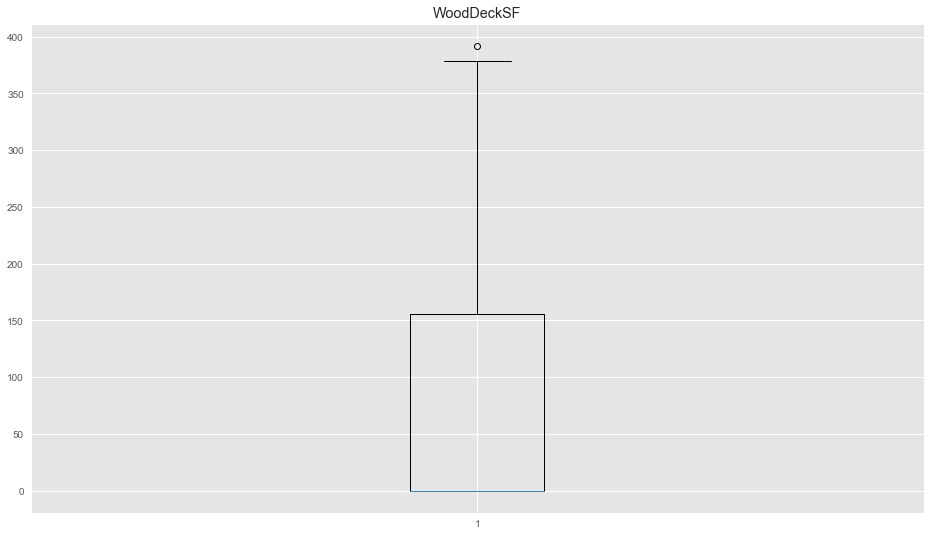

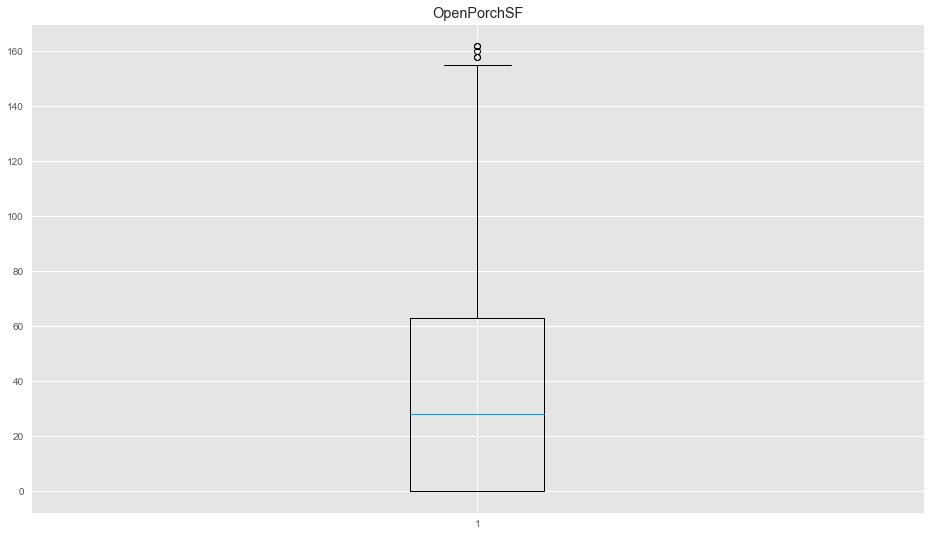

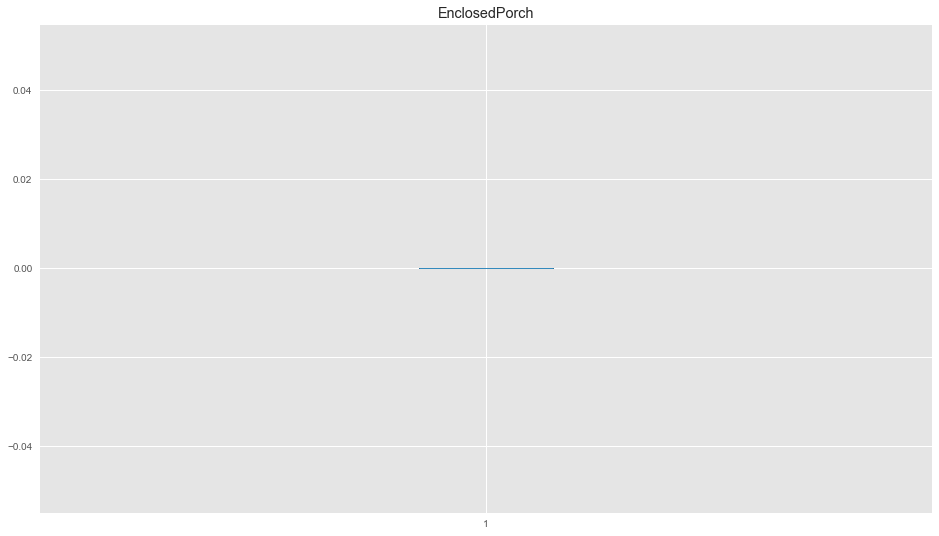

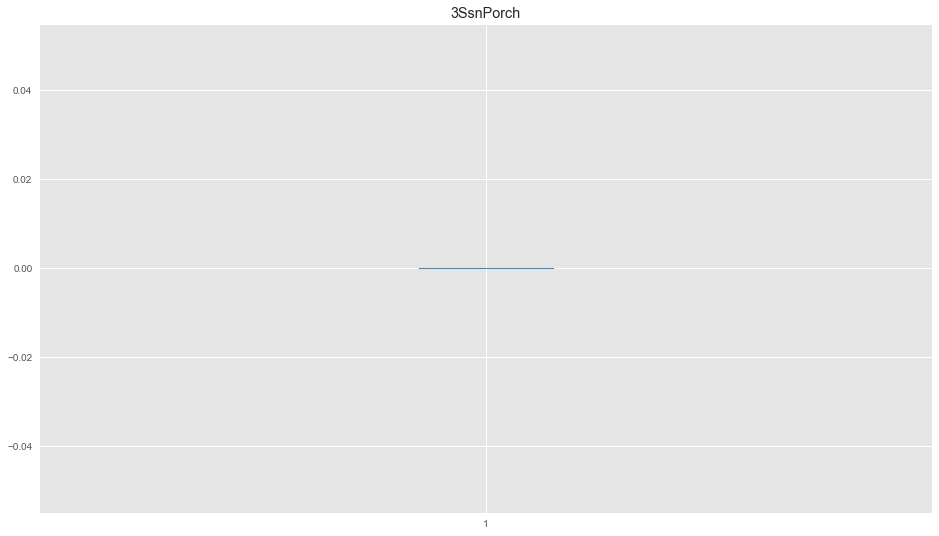

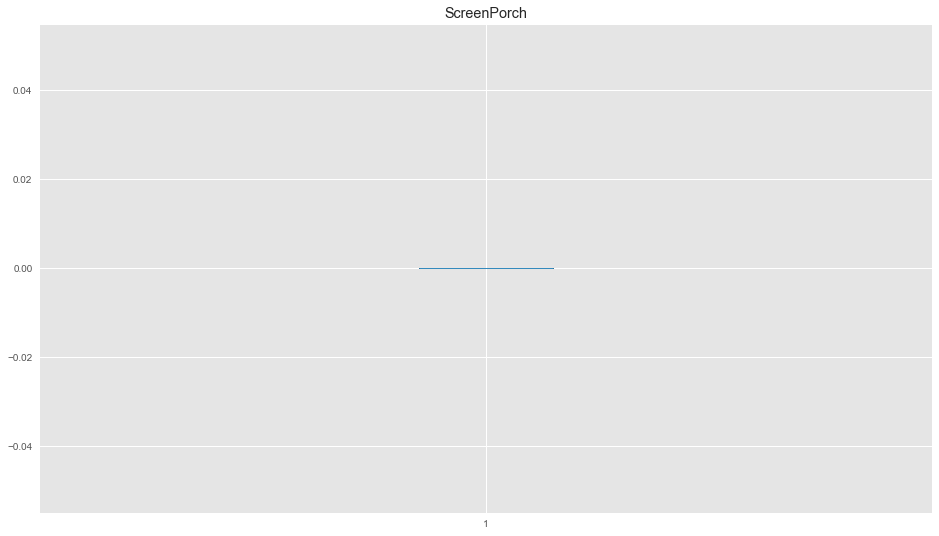

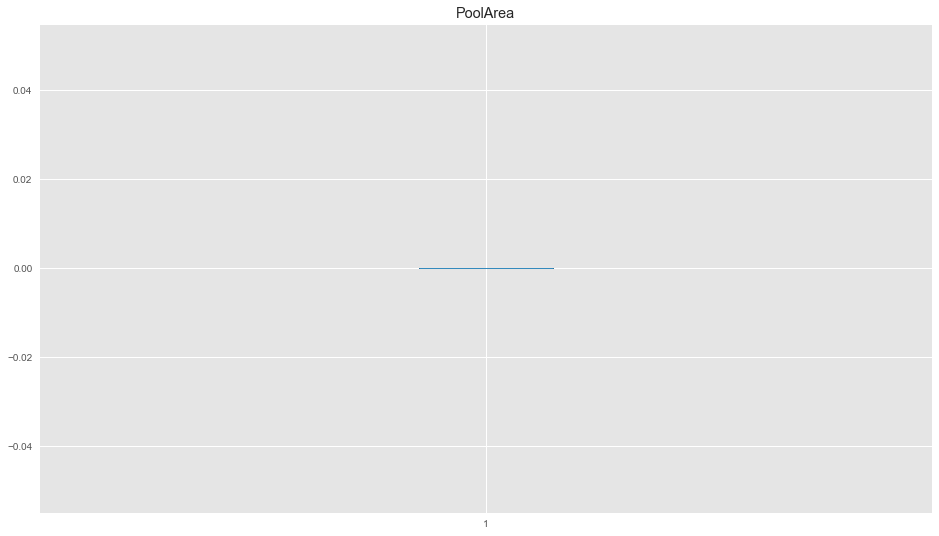

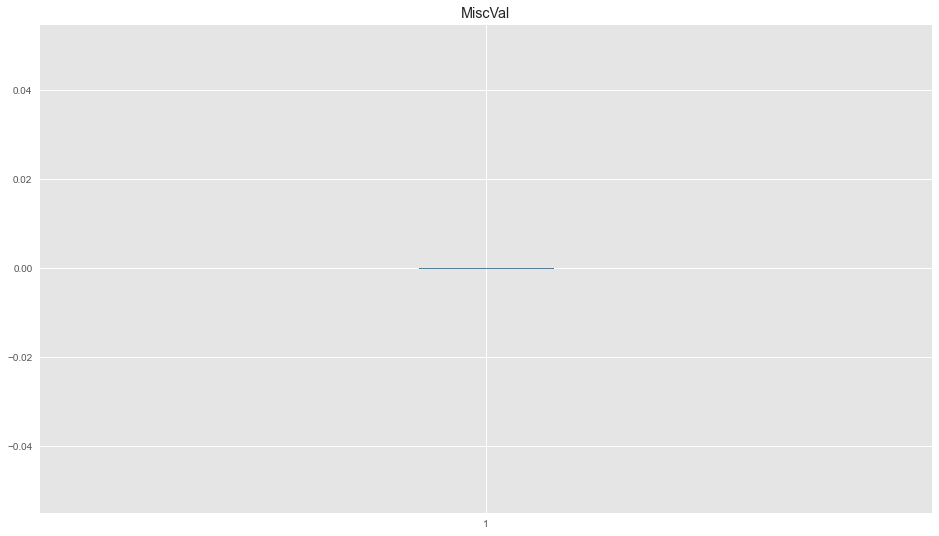

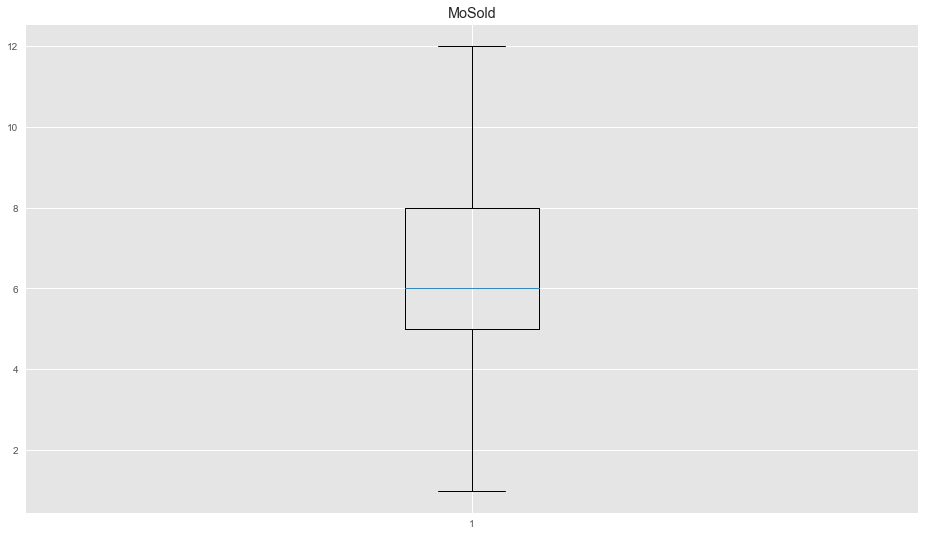

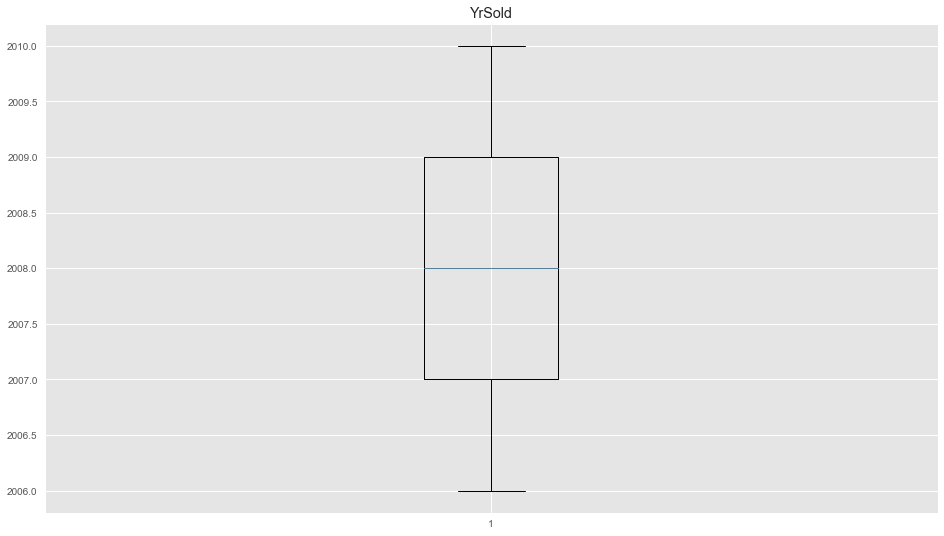

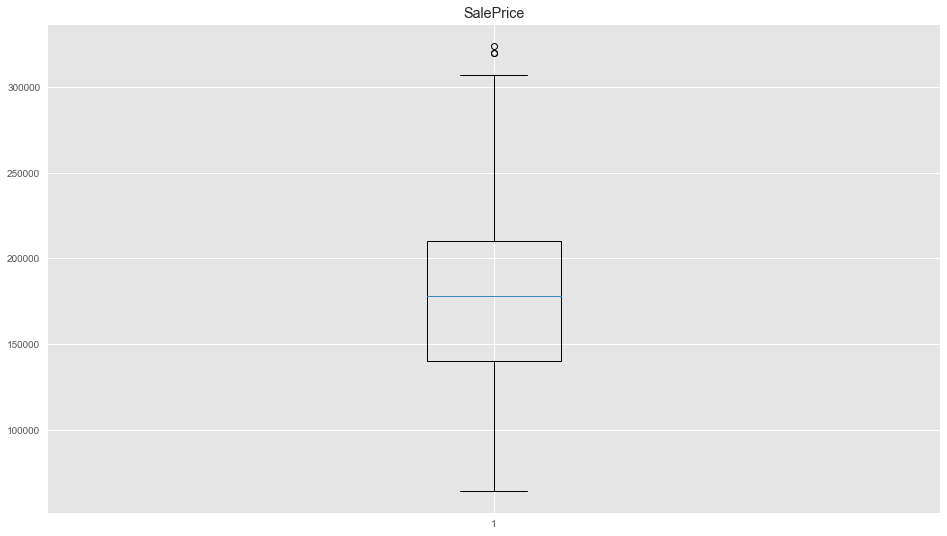

In [65]:
for columna in columns:
    Q1 = entrenamiento[columna].quantile(0.25)
    Q3 = entrenamiento[columna].quantile(0.75)
    IQR = Q3 - Q1

    indexes = entrenamiento[entrenamiento[columna] < (Q1 - 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)

    indexes = entrenamiento[entrenamiento[columna] > (Q3 + 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)
    
    plt.boxplot(entrenamiento[columna])
    plt.title(columna)
    plt.show()

### Muestra Representativa de los Datos

In [74]:
sample = entrenamiento.copy()

sample["combined"] = list(
    zip(
        sample["MSSubClass"],
        sample["LotFrontage"],
        sample["LotArea"],
        sample["OverallQual"],
        sample["OverallCond"],
        sample["YearBuilt"],
        sample["YearRemodAdd"],
        sample["MasVnrArea"],
        sample["BsmtFinSF1"],
        sample["BsmtFinSF2"],
        sample["BsmtUnfSF"],
        sample["TotalBsmtSF"],
        sample["1stFlrSF"],
        sample["2ndFlrSF"],
        sample["LowQualFinSF"],
        sample["GrLivArea"],
        sample["BsmtFullBath"],
        sample["BsmtHalfBath"],
        sample["FullBath"],
        sample["HalfBath"],
        sample["BedroomAbvGr"],
        sample["KitchenAbvGr"],
        sample["TotRmsAbvGrd"],
        sample["Fireplaces"],
        sample["GarageYrBlt"],
        sample["GarageCars"],
        sample["GarageArea"],
        sample["WoodDeckSF"],
        sample["OpenPorchSF"],
        sample["EnclosedPorch"],
        sample["3SsnPorch"],
        sample["ScreenPorch"],
        sample["PoolArea"],
        sample["MiscVal"],
        sample["MoSold"],
        sample["YrSold"],
        sample["SalePrice"]
    )
)

combined_weight = sample['combined'].value_counts(normalize=True)

sample['combined_weight'] = sample['combined'].apply(lambda x: combined_weight[x])

sample = sample.sample(65, weights=sample['combined_weight'])
sample = sample.drop(["combined_weight"], axis=1)

sample.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,...,65.000000,65.000000,65.0,65.0,65.0,65.0,65.0,65.000000,65.000000,65.000000
mean,47.00000,66.030769,8794.584615,6.123077,5.353846,1983.646154,1989.707692,59.169231,429.307692,0.0,...,95.753846,38.538462,0.0,0.0,0.0,0.0,0.0,6.030769,2007.615385,175922.046154
std,30.90813,14.410249,2066.180110,1.152547,0.738046,24.481773,19.890107,100.956452,424.770891,0.0,...,105.062783,37.047721,0.0,0.0,0.0,0.0,0.0,2.663229,1.295332,44915.134067
min,20.00000,32.000000,3600.000000,4.000000,4.000000,1910.000000,1950.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,106500.000000
25%,20.00000,60.000000,7577.000000,5.000000,5.000000,1962.000000,1972.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000,2007.000000,138000.000000
50%,50.00000,68.000000,8892.000000,6.000000,5.000000,1997.000000,2000.000000,0.000000,380.000000,0.0,...,96.000000,36.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2007.000000,178000.000000
75%,60.00000,76.000000,9803.000000,7.000000,6.000000,2005.000000,2005.000000,99.000000,746.000000,0.0,...,172.000000,59.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,203000.000000
max,120.00000,103.000000,14006.000000,8.000000,7.000000,2007.000000,2008.000000,415.000000,1300.000000,0.0,...,379.000000,158.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,297000.000000


### Correlacion de variables

#### Original

<AxesSubplot:>

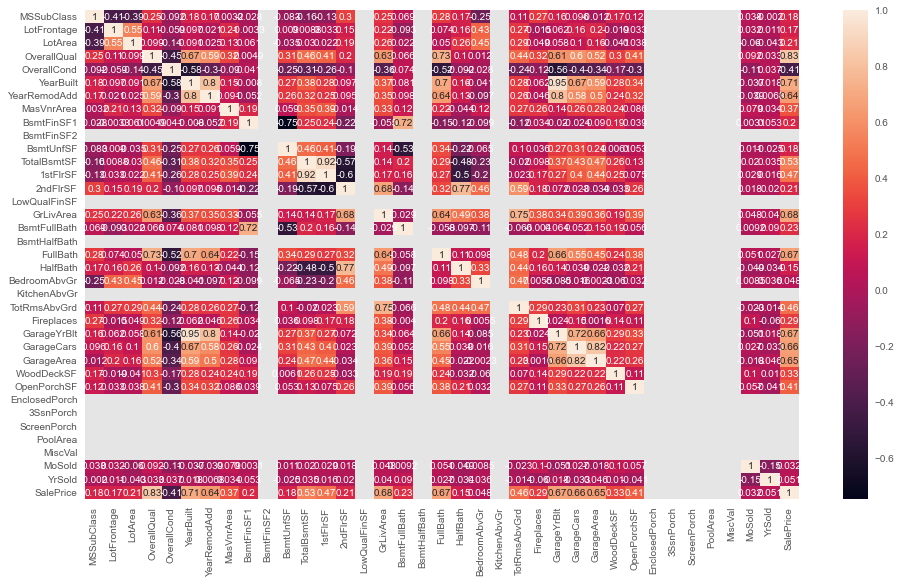

In [70]:
correlacion = entrenamiento.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

<AxesSubplot:>

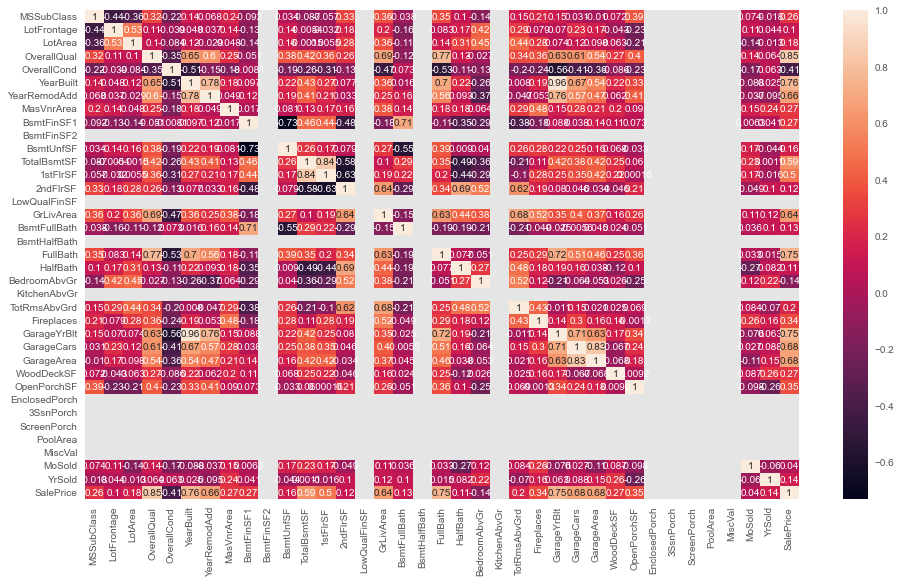

In [75]:
correlacion = sample.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)